<a href="https://colab.research.google.com/github/ptk18/Book-Recommendation-DS-Project-/blob/main/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instructions
You need to upload the provided "locations.json" file to your Google Drive, and then change the path here to point to that locations.json file.

There is an issue where you cannot directly upload that file to Google Colab, as that will cause the file to be corrupted.

You must upload to your drive, mount your drive, then change this location to point to your locations.json path in your drive.

In [ ]:
locations_path_gdrive = "/content/drive/MyDrive/locations.json"

In [ ]:
!which python

/usr/local/bin/python


In [ ]:
import sys

In [ ]:
locations_path = "data/locations.json"
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    !pip install --upgrade ujson surprise #geopy keras-nlp keras
    locations_path = locations_path_gdrive

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.5 MB/s eta 0:00:00
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357278 sha256=c77a2de55acc46b672f4793841914b70151eb1b285eb91b981f8524e797a7296
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import sklearn.feature_extraction
import sklearn.pipeline
import sklearn.impute
import sklearn.naive_bayes
import sklearn.svm
# import sklearnex
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import ujson
import os
from scipy import stats
# import keras_nlp
# import keras
# import tensorflow as tf

In [ ]:
# sklearnex.patch_sklearn()

#Get Data

In [ ]:
!mkdir -p data

In [ ]:
!cd data &&for k in 'arashnic/book-recommendation-dataset' 'elvinrustam/books-dataset' 'max-mind/world-cities-database' 'athu1105/book-genre-prediction'; do kaggle datasets download -d $$k; done

Dataset URL: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset
License(s): CC0-1.0
 70% 17.0M/24.3M [00:00<00:00, 87.7MB/s]
100% 24.3M/24.3M [00:00<00:00, 103MB/s] 
Dataset URL: https://www.kaggle.com/datasets/elvinrustam/books-dataset
License(s): CC0-1.0
100% 52.9M/52.9M [00:00<00:00, 76.9MB/s]
100% 52.9M/52.9M [00:00<00:00, 79.3MB/s]
Dataset URL: https://www.kaggle.com/datasets/max-mind/world-cities-database
License(s): other
 99% 42.0M/42.4M [00:00<00:00, 123MB/s] 
100% 42.4M/42.4M [00:00<00:00, 104MB/s]
Dataset URL: https://www.kaggle.com/datasets/athu1105/book-genre-prediction
License(s): CC0-1.0
  0% 0.00/3.73M [00:00<?, ?B/s]
100% 3.73M/3.73M [00:00<00:00, 51.6MB/s]


In [ ]:
!cd data && for j in `ls *.zip`; do unzip -n "./$$j"; done

Archive:  ./book-genre-prediction.zip
  inflating: data.csv                
Archive:  ./book-recommendation-dataset.zip
  inflating: Books.csv               
  inflating: DeepRec.png             
  inflating: Ratings.csv             
  inflating: Users.csv               
  inflating: classicRec.png          
  inflating: recsys_taxonomy2.png    
Archive:  ./books-dataset.zip
  inflating: BooksDataset.csv        
  inflating: BooksDatasetClean.csv   
Archive:  ./world-cities-database.zip
  inflating: LICENSE.txt             
  inflating: worldcitiespop.csv      


In [ ]:
!wget -nc https://github.com/uchidalab/book-dataset/raw/refs/heads/master/Task2/book32-listing.csv -O ./data/books_genre.csv

--2024-11-09 16:49:52--  https://github.com/uchidalab/book-dataset/raw/refs/heads/master/Task2/book32-listing.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/uchidalab/book-dataset/refs/heads/master/Task2/book32-listing.csv [following]
--2024-11-09 16:49:53--  https://raw.githubusercontent.com/uchidalab/book-dataset/refs/heads/master/Task2/book32-listing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39483760 (38M) [application/octet-stream]
Saving to: ‘./data/books_genre.csv’

./data/books_genre. 100%[===================>]  37.65M   140MB/s    in 0.3s    

2024-11-09 16:49:54 (140 MB/s

In [ ]:
!pwd

/content


In [ ]:
reading_age_range = (1, 100)

In [ ]:
os.listdir('data')

['BooksDatasetClean.csv',
 'world-cities-database.zip',
 'book-recommendation-dataset.zip',
 'book-genre-prediction.zip',
 'Books.csv',
 'LICENSE.txt',
 'DeepRec.png',
 'BooksDataset.csv',
 'books_genre.csv',
 'Ratings.csv',
 'books-dataset.zip',
 'worldcitiespop.csv',
 'Users.csv',
 'classicRec.png',
 'data.csv',
 'recsys_taxonomy2.png']

In [ ]:
dfs = {}
for i in os.listdir("data"):
    if i[-4:] == '.csv':
        name = i[:-4].lower()
        try:
            exec(f"""{name} = pd.read_csv('{"data/" + i}')""")
        except UnicodeDecodeError as _:
            exec(f"""{name} = pd.read_csv('{"data/" + i}', encoding="ISO-8859-1", header=None)""")
        print(f"{name}: {eval(f'{name}').columns}")
        dfs[name] = eval(name)

booksdatasetclean: Index(['Title', 'Authors', 'Description', 'Category', 'Publisher',
       'Price Starting With ($)', 'Publish Date (Month)',
       'Publish Date (Year)'],
      dtype='object')


<string>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.


books: Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')
booksdataset: Index(['Title', 'Authors', 'Description', 'Category', 'Publisher',
       'Publish Date', 'Price'],
      dtype='object')
books_genre: Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')
ratings: Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')


<string>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.


worldcitiespop: Index(['Country', 'City', 'AccentCity', 'Region', 'Population', 'Latitude',
       'Longitude'],
      dtype='object')
users: Index(['User-ID', 'Location', 'Age'], dtype='object')
data: Index(['index', 'title', 'genre', 'summary'], dtype='object')


#Data Overview

In [ ]:
dfs.keys()

dict_keys(['booksdatasetclean', 'books', 'booksdataset', 'books_genre', 'ratings', 'worldcitiespop', 'users', 'data'])

In [ ]:
dfs['ratings']

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [ ]:
dfs['books']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [ ]:
dfs['users']

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [ ]:
dfs['booksdataset']

,Title,Authors,Description,Category,Publisher,Publish Date,Price
0,Goat Brothers,"By Colton, Larry",NaN,"History , General",Doubleday,"Friday, January 1, 1993",Price Starting at $8.79
1,The Missing Person,"By Grumbach, Doris",NaN,"Fiction , General",Putnam Pub Group,"Sunday, March 1, 1981",Price Starting at $4.99
2,Don't Eat Your Heart Out Cookbook,"By Piscatella, Joseph C.",NaN,"Cooking , Reference",Workman Pub Co,"Thursday, September 1, 1983",Price Starting at $4.99
3,When Your Corporate Umbrella Begins to Leak: A...,"By Davis, Paul D.",NaN,NaN,Natl Pr Books,"Monday, April 1, 1991",Price Starting at $4.99
4,Amy Spangler's Breastfeeding : A Parent's Guide,"By Spangler, Amy",NaN,NaN,Amy Spangler,"Saturday, February 1, 1997",Price Starting at $5.32
...,...,...,...,...,...,...,...
103077,Build 3 Super Serving Carts,By Chuck Hampton,NaN,NaN,ENDesigns Inc.,"Wednesday, January 1, 1992",Price Starting at $9.97
103078,My Land of Israel,"By Nover, Elizabeth Z.",NaN,"Juvenile Nonfiction , People & Places , Middl...",Behrman House,"Friday, May 1, 1987",Price Starting at $4.99
103079,Tongues: To Speak or Not to Speak,By Donald W. Burdick,NaN,NaN,Moody Press,"Wednesday, January 1, 1969",Price Starting at $5.29
103080,If I'm in charge here why is everybody laughing?,"By Campbell, David P.",NaN,NaN,Argus Communications,"Tuesday, January 1, 1980",Price Starting at $4.99


#Explore and Clean Books

In [ ]:
dfs['books'].info()
dfs['books'][['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
count,271360,271360,271358,271360,271358
unique,271360,242135,102022,202,16807
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin
freq,1,27,632,13903,7535


In [ ]:
try:
    dfs['books']['Year-Of-Publication'].astype(int)
except Exception as e:
    print(e)

invalid literal for int() with base 10: 'DK Publishing Inc'


In [ ]:
dfs['books'][~dfs['books']['Year-Of-Publication'].astype(str).str.fullmatch("[0-9]+")]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [ ]:
dfs['books'][dfs['books']['Book-Author'].astype(str).str.fullmatch(r"[0-9]+")]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [ ]:
matcher = ~dfs['books']['Year-Of-Publication'].astype(str).str.match("[0-9]+") & dfs['books']['Book-Author'].astype(str).str.fullmatch(r"[0-9]+")
wrong_rows = dfs['books'][matcher]

In [ ]:
wrong_rows.loc[:, "Book-Title":]

,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [ ]:
z = dfs['books'].loc[matcher, "Book-Author":"Image-URL-L"]
z.columns = list(z.columns)[1:] + ["___________"]
z

,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,___________
209538,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [ ]:
dfs['books'].loc[matcher, :]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [ ]:
dfs['books'].loc[matcher, "Year-Of-Publication":] = z

In [ ]:
dfs['books'].loc[matcher]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...


In [ ]:
list(wrong_rows["Book-Title"])

['DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\\";Michael Teitelbaum"',
 'Peuple du ciel, suivi de \'Les Bergers\\";Jean-Marie Gustave Le ClÃ?Â©zio"',
 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\\";James Buckley"']

In [ ]:
wrong_rows.columns[1:3]

Index(['Book-Title', 'Book-Author'], dtype='object')

In [ ]:
wrong_rows.index

Index([209538, 220731, 221678], dtype='int64')

In [ ]:
z = pd.DataFrame([s.replace('"', '').split('\\;') for s in wrong_rows["Book-Title"]])
z.columns = wrong_rows.columns[1:3]
z.index = wrong_rows.index
z

,Book-Title,Book-Author
209538,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum
220731,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio
221678,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley


In [ ]:
dfs['books'].loc[matcher, "Book-Title":	"Book-Author"] = z

In [ ]:
dfs['books'].loc[matcher]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...


In [ ]:
dfs['books']['Year-Of-Publication-str'] = dfs['books']['Year-Of-Publication']

In [ ]:
zero_prev = (dfs['books']['Year-Of-Publication-str'] == '0')
zero_prev.sum()

1048

In [ ]:
dfs['books_prev'] = dfs['books']
dfs['books'] = dfs['books'].astype(dict(zip(dfs['books'].columns, [str, str, str, int, str, str, str, str, str])))
dfs['books']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Year-Of-Publication-str
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2002
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,2001
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,1991
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,1999
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,1999
...,...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,1988
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,1991
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,2004
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,1996


In [ ]:
zero_prev = (dfs['books_prev']['Year-Of-Publication-str'] == '0')
zero_aft = (dfs['books']['Year-Of-Publication-str'] == '0')
zero_prev.sum(), zero_aft.sum()

(1048, 4618)

In [ ]:
(zero_aft & zero_prev).sum(), (zero_aft | zero_prev).sum(),

(1048, 4618)

In [ ]:
dfs['books_prev']['Year-Of-Publication-str'][zero_aft & ~zero_prev]

,Year-Of-Publication-str
176,0
188,0
288,0
351,0
542,0
...,...
270794,0
270913,0
271094,0
271182,0


In [ ]:
dfs['books_prev']['Year-Of-Publication-str'][zero_aft & ~zero_prev] == '0'

,Year-Of-Publication-str
176,False
188,False
288,False
351,False
542,False
...,...
270794,False
270913,False
271094,False
271182,False


In [ ]:
l = list(dfs['books_prev']['Year-Of-Publication-str'][zero_aft & ~zero_prev])

In [ ]:
{i for i in l}

{0}

In [ ]:
{type(i) for i in l}

{int}

In [ ]:
(lambda x: (x == '0') | (x == 0))(dfs['books_prev']['Year-Of-Publication-str']).sum()

4618

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
dfs['books'].info()
dfs['books'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ISBN                     271360 non-null  object
 1   Book-Title               271360 non-null  object
 2   Book-Author              271360 non-null  object
 3   Year-Of-Publication      271360 non-null  int64 
 4   Publisher                271360 non-null  object
 5   Image-URL-S              271360 non-null  object
 6   Image-URL-M              271360 non-null  object
 7   Image-URL-L              271360 non-null  object
 8   Year-Of-Publication-str  271360 non-null  object
dtypes: int64(1), object(8)
memory usage: 18.6+ MB


,Year-Of-Publication
count,271360.000000
mean,1959.761273
std,257.992836
min,0.000000
25%,1989.000000
50%,1995.000000
75%,2000.000000
max,2050.000000


In [ ]:
dfs['books'].dtypes==object

,0
ISBN,True
Book-Title,True
Book-Author,True
Year-Of-Publication,False
Publisher,True
Image-URL-S,True
Image-URL-M,True
Image-URL-L,True
Year-Of-Publication-str,True


In [ ]:
for i, j in dfs['books'].loc[:, dfs['books'].dtypes==object].items():
    print(f'Empty strings in {i}: {j.str.fullmatch("").sum()}')

Empty strings in ISBN: 0
Empty strings in Book-Title: 0
Empty strings in Book-Author: 0
Empty strings in Publisher: 0
Empty strings in Image-URL-S: 0
Empty strings in Image-URL-M: 0
Empty strings in Image-URL-L: 0
Empty strings in Year-Of-Publication-str: 0


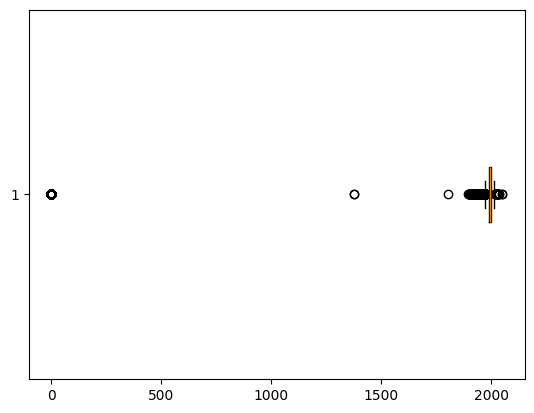

In [ ]:
plt.boxplot(dfs['books']['Year-Of-Publication'], vert=False);

In [ ]:
(lambda x: (x, x/len(dfs['books'])))((dfs['books']['Year-Of-Publication'] < 1800).sum())

(4620, 0.017025353773584904)

In [ ]:
dfs['books_with_zero_yop'] = dfs['books']
dfs['books'] = dfs['books'][~(dfs['books']['Year-Of-Publication'] < 1800)]

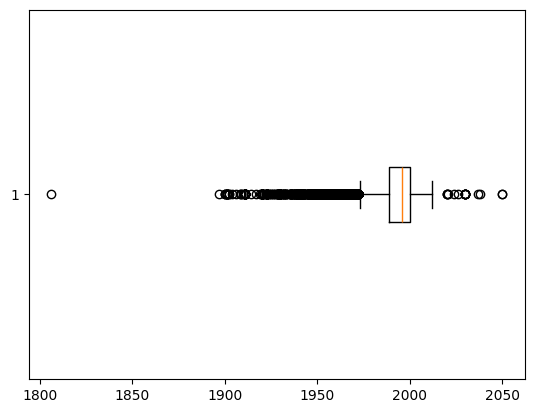

In [ ]:
plt.boxplot(dfs['books']['Year-Of-Publication'], vert=False);

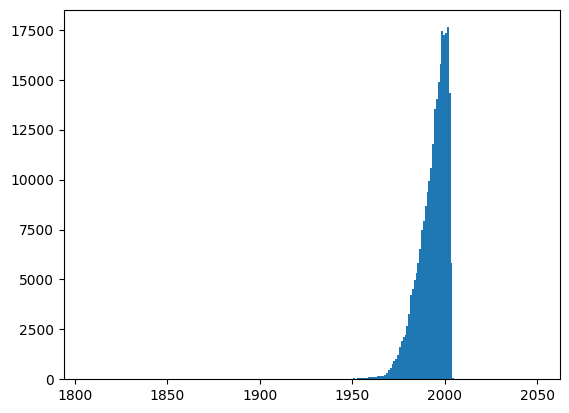

In [ ]:
(lambda x: plt.hist(x, bins=x.max()-x.min()+1))(dfs['books']['Year-Of-Publication']);

In [ ]:
yf = dfs['books'][dfs['books']['Year-Of-Publication'] < 1850]
yf

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Year-Of-Publication-str
171817,0781228956,"Complete Works 10 Volumes [2,6,7,8,9] (Notable...",Benjamin Franklin,1806,Reprint Services Corp,http://images.amazon.com/images/P/0781228956.0...,http://images.amazon.com/images/P/0781228956.0...,http://images.amazon.com/images/P/0781228956.0...,1806


In [ ]:
dfs['books']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Year-Of-Publication-str
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2002
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,2001
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,1991
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,1999
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,1999
...,...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,1988
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,1991
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,2004
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,1996


In [ ]:
dfs['books'][['ISBN']].describe()

,ISBN
count,266740
unique,266740
top,0195153448
freq,1


#Inspecting and Cleaning Ratings

In [ ]:
dfs['ratings'].info()
dfs['ratings'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


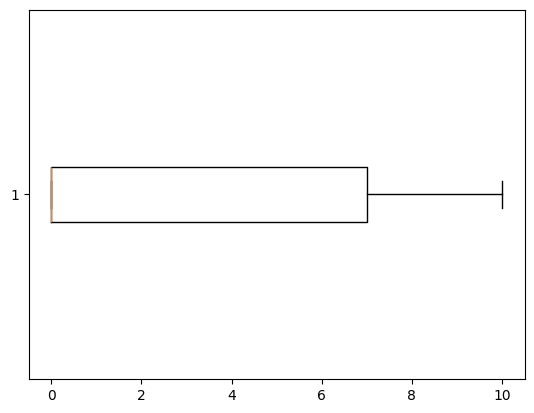

In [ ]:
plt.boxplot(dfs['ratings']['Book-Rating'], vert=False);

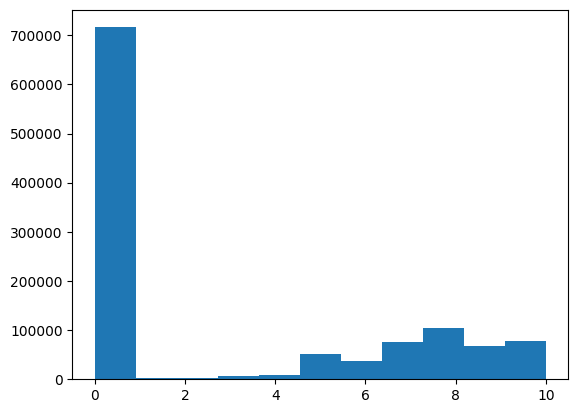

In [ ]:
(lambda x: plt.hist(x, bins=x.max()-x.min()+1))(dfs['ratings']['Book-Rating']);

The ratings with value 0 are implicit, meaning no numerical rating is given

In [ ]:
dfs['ratings_with_implicit'] = dfs['ratings']
dfs['ratings'] = dfs['ratings'][dfs['ratings']['Book-Rating'] != 0]

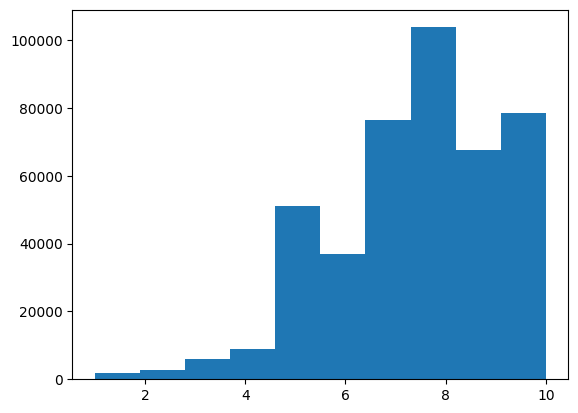

In [ ]:
(lambda x: plt.hist(x, bins=x.max()-x.min()+1))(dfs['ratings']['Book-Rating']);

In [ ]:
dfs['ratings']

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6
...,...,...,...
1149773,276704,0806917695,5
1149775,276704,1563526298,9
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [ ]:
_ = dfs['ratings'].groupby('User-ID').count()
_

,ISBN,Book-Rating
User-ID,,
8,7,7
9,1,1
10,1,1
12,1,1
14,3,3
...,...,...
278846,1,1
278849,1,1
278851,14,14


In [ ]:
dfs['users'].info()
dfs['users'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [ ]:
dfs['users']['Age']

,Age
0,NaN
1,18.0
2,NaN
3,17.0
4,NaN
...,...
278853,NaN
278854,50.0
278855,NaN
278856,NaN


In [ ]:
above_rar = (dfs['users']['Age'] >= reading_age_range[1])
below_rar = (dfs['users']['Age'] <= reading_age_range[0])
[k.sum() for k in (above_rar, below_rar)]

[373, 704]

In [ ]:
dfs['users_non_age_checked'] = dfs['users']
dfs['users'] = dfs['users'][~(above_rar | below_rar)]

In [ ]:
dfs['users']

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


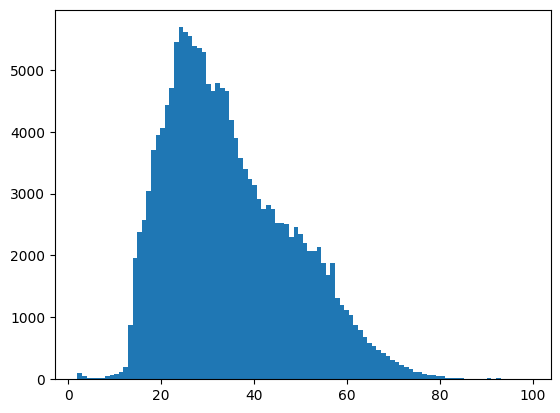

In [ ]:
(lambda x: plt.hist(x, bins=int(x.max()-x.min())+1))(dfs['users']['Age']);

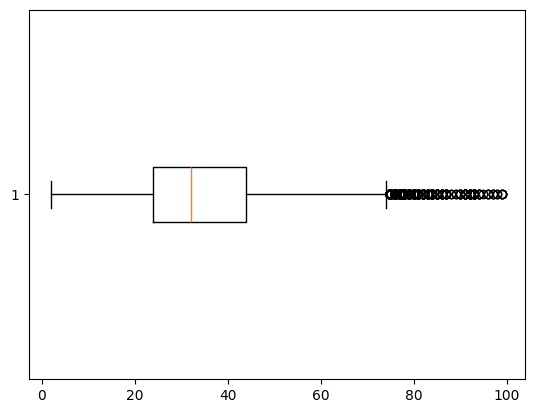

In [ ]:
plt.boxplot(dfs['users']['Age'][~dfs['users']['Age'].isnull()], vert=False);

In [ ]:
dfs['users'][~dfs['users']['Location'].str.fullmatch(', '.join([".*"]*3))]

,User-ID,Location,Age
18,19,"weston, ,",14.0
90,91,"toronto/newmarket, ,",NaN
311,312,"lk, jlk,",NaN
317,318,"berlin, n/a,",NaN
536,537,"davis, california,",NaN
...,...,...,...
278624,278625,"savona, ,",36.0
278651,278652,"murrieta, ,",NaN
278697,278698,"pasadena, maryland,",NaN
278716,278717,"mayagüez, puerto rico,",53.0


In [ ]:
l = dfs['users']['Location'].str.split(',')

In [ ]:
l.explode().index

Index([     0,      0,      0,      1,      1,      1,      2,      2,      2,
            3,
       ...
       278854, 278855, 278855, 278855, 278856, 278856, 278856, 278857, 278857,
       278857],
      dtype='int64', length=834962)

In [ ]:
le = l.explode()

In [ ]:
l[le.groupby(le.index).count() != 3]

,Location
435,"[ivanhoe, melbourne, victoria, australia]"
814,"[davis bay, sechelt, british columbia, canada]"
840,"[saint charles, mo, missouri, usa]"
956,"[santiago, santiago, metropolitana, chile]"
1459,"[mansoura, dakahlia, mansoura, egypt]"
...,...
277717,"[colorado springs, co 80901, colorado, usa]"
277753,"[north bend, , oregon, usa]"
278028,"[mansfield, nottinghamshire, england, unite..."
278214,"[nelson, motueka, nz, new zealand]"


-----------------------------------------------------

In [ ]:
dfs['users'].groupby('Location').count()

,User-ID,Age
Location,,
"&#19978;&#28023;, shanghai, china",1,1
"&#19978;&#28023;/&#21488;&#24030;/&#36335;&#26725;, alberta, china",1,1
"&#20013;&#22269;&#24191;&#19996;&#30465;&#24265;&#27743;&#24066;, florida, china",1,0
"&#20013;&#22269;&#27993;&#27743;&#30465;&#27704;&#24247;&#24066;, , china",1,1
"&#20013;&#23665;&#24066;, puerto rico, hong kong",1,0
...,...,...
"ýstanbul, ýstanbul, turkey",5,4
"ýstanbul, ýstanbul/anadolu, turkey",1,1
"ýzmir, connecticut, turkey",1,1


In [ ]:
nom = Nominatim(user_agent="get matching location data")
nom

In [ ]:
geocode = RateLimiter(lambda x: nom.geocode(x, addressdetails=True, language=True, extratags=True, namedetails=False), min_delay_seconds=1)
geocode

In [ ]:
with open(locations_path, 'rb') as f:
    locations = ujson.load(f)
locations

{'nyc, new york, usa': {'place_id': 389518145,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
  'osm_type': 'relation',
  'osm_id': 175905,
  'lat': '40.7127281',
  'lon': '-74.0060152',
  'class': 'boundary',
  'type': 'administrative',
  'place_rank': 10,
  'importance': 0.8716708671039277,
  'addresstype': 'city',
  'name': 'City of New York',
  'display_name': 'City of New York, New York, United States',
  'address': {'city': 'City of New York',
   'state': 'New York',
   'ISO3166-2-lvl4': 'US-NY',
   'country': 'United States',
   'country_code': 'us'},
  'extratags': {'ele': '10',
   'rank': '0',
   'place': 'city',
   'capital': '5',
   'website': 'https://www.nyc.gov',
   'wikidata': 'Q60',
   'wikipedia': 'en:New York City',
   'importance': 'international',
   'population': '8467513',
   'start_date': '1674-11-01',
   'border_type': 'city',
   'linked_place': 'city',
   'nist:fips_code': '3608151000',
   'ref:us:ny:swis': '650000',
   's

In [ ]:
dfs['users']['Location'].unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [ ]:
GET_LOCATIONS = False
if GET_LOCATIONS:
    for location in dfs['users']['Location'].unique():
        if location not in locations:
            z = geocode(location)
            locations[location] = z.raw if z is not None else z
            with open("data/locations.json", 'w') as f:
                ujson.dump(locations, f)

In [ ]:
dfs['locations_raw'] = pd.read_json(locations_path).T
dfs['locations_raw']

,place_id,licence,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name,address,extratags,boundingbox
"nyc, new york, usa",389518145,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,175905,40.7127281,-74.0060152,boundary,administrative,10,0.871671,city,City of New York,"City of New York, New York, United States","{'city': 'City of New York', 'state': 'New Yor...","{'ele': '10', 'rank': '0', 'place': 'city', 'c...","[40.4765780, 40.9176300, -74.2588430, -73.7002..."
"stockton, california, usa",281868102,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,112382,37.9577016,-121.290779,boundary,administrative,16,0.551826,city,Stockton,"Stockton, San Joaquin County, California, Unit...","{'city': 'Stockton', 'county': 'San Joaquin Co...","{'ele': '4', 'place': 'city', 'capital': '6', ...","[37.8877470, 38.0583000, -121.4197360, -121.18..."
"moscow, yukon territory, russia",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"porto, v.n.gaia, portugal",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"farnborough, hants, united kingdom",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"wiesloch, baden-württemberg, germany",108062135,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,453399,49.2942599,8.698707,boundary,administrative,16,0.47243,town,Wiesloch,"Wiesloch, Verwaltungsgemeinschaft Wiesloch, Rh...","{'town': 'Wiesloch', 'municipality': 'Verwaltu...","{'de:place': 'town', 'wikidata': 'Q22874', 'wi...","[49.2651942, 49.3307401, 8.6478028, 8.7801926]"
"mirafores de la sierra, massachusetts, spain",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"el paso, texas, united kingdom",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"xichang, alaska, china",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfs['locations_raw'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 57316 entries, nyc, new york, usa to gillett, pennsylvania, canada
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   place_id      44676 non-null  object
 1   licence       44676 non-null  object
 2   osm_type      44655 non-null  object
 3   osm_id        44655 non-null  object
 4   lat           44676 non-null  object
 5   lon           44676 non-null  object
 6   class         44676 non-null  object
 7   type          44676 non-null  object
 8   place_rank    44676 non-null  object
 9   importance    44676 non-null  object
 10  addresstype   44676 non-null  object
 11  name          44676 non-null  object
 12  display_name  44676 non-null  object
 13  address       44676 non-null  object
 14  extratags     42360 non-null  object
 15  boundingbox   44676 non-null  object
dtypes: object(16)
memory usage: 9.4+ MB


In [ ]:
dfs['locations_raw_obj'] = dfs['locations_raw']
dfs['locations_raw'] = dfs['locations_raw'].astype({"place_id": float, "licence": str, "osm_type": str, "osm_id": float, "lat": float, "lon": float, "class": str, "type": str, "place_rank": float, "importance": float, "addresstype": str, "name": str, "display_name": str})

In [ ]:
dfs['locations'] = dfs['locations_raw']

In [ ]:
dfs['locations']['address'].isnull().sum()

12640

In [ ]:
dfs['locations_with_null'] = dfs['locations']

In [ ]:
dfs['locations'] = dfs['locations'].loc[~dfs['locations']['address'].isnull()]
dfs['locations']

,place_id,licence,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name,address,extratags,boundingbox
"nyc, new york, usa",389518145.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,1.759050e+05,40.712728,-74.006015,boundary,administrative,10.0,0.871671,city,City of New York,"City of New York, New York, United States","{'city': 'City of New York', 'state': 'New Yor...","{'ele': '10', 'rank': '0', 'place': 'city', 'c...","[40.4765780, 40.9176300, -74.2588430, -73.7002..."
"stockton, california, usa",281868102.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,1.123820e+05,37.957702,-121.290779,boundary,administrative,16.0,0.551826,city,Stockton,"Stockton, San Joaquin County, California, Unit...","{'city': 'Stockton', 'county': 'San Joaquin Co...","{'ele': '4', 'place': 'city', 'capital': '6', ...","[37.8877470, 38.0583000, -121.4197360, -121.18..."
"santa monica, california, usa",280187326.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,3.353288e+06,34.019470,-118.491227,boundary,administrative,16.0,0.651435,city,Santa Monica,"Santa Monica, California, United States","{'city': 'Santa Monica', 'state': 'California'...","{'place': 'city', 'wikidata': 'Q47164', 'wikip...","[33.9666583, 34.0505825, -118.5534678, -118.44..."
"washington, dc, usa",303031573.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,5.396194e+06,38.895037,-77.036543,boundary,administrative,12.0,0.803067,city,Washington,"Washington, District of Columbia, United States","{'city': 'Washington', 'state': 'District of C...","{'ele': '7', 'rank': '0', 'place': 'city', 'ca...","[38.7916303, 38.9959680, -77.1197949, -76.9093..."
"timmins, ontario, canada",328264744.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,7.588071e+06,48.477473,-81.330414,boundary,administrative,16.0,0.449192,city,Timmins,"Timmins, Cochrane District, Northeastern Ontar...","{'city': 'Timmins', 'county': 'Cochrane Distri...","{'place': 'city', 'website': 'https://www.timm...","[48.2765014, 48.7116561, -81.7276447, -80.8114..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"dunkeld, victoria, australia",16885615.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,3.161047e+06,-37.649447,142.344164,boundary,administrative,18.0,0.278689,town,Dunkeld,"Dunkeld, Shire of Southern Grampians, Victoria...","{'town': 'Dunkeld', 'municipality': 'Shire of ...","{'wikidata': 'Q5315351', 'wikipedia': 'en:Dunk...","[-37.7584210, -37.5860530, 142.2315970, 142.45..."
"butler, western australia, australia",27343178.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,1.009642e+10,-31.635694,115.700326,railway,station,30.0,0.283828,railway,Butler,"Butler, Yanchep Line PSP, Butler, City of Wann...","{'railway': 'Butler', 'road': 'Yanchep Line PS...","{'train': 'yes', 'network': 'Transperth', 'ope...","[-31.6406944, -31.6306944, 115.6953262, 115.70..."
"grenoble, rhône, france",75851648.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,8.034800e+04,45.187560,5.735782,boundary,administrative,16.0,0.684579,city,Grenoble,"Grenoble, Isère, Auvergne-Rhône-Alpes, France ...","{'city': 'Grenoble', 'municipality': 'Grenoble...","{'capital': '6', 'wikidata': 'Q1289', 'ref:INS...","[45.1541442, 45.2140762, 5.6776059, 5.7531315]"
"mayagüez, puerto rico,",267946270.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,4.467818e+06,18.201116,-67.139112,boundary,administrative,12.0,0.545847,city,Mayagüez,"Mayagüez, Puerto Rico, United States","{'city': 'Mayagüez', 'state': 'Puerto Rico', '...","{'capital': '6', 'wikidata': 'Q632727', 'sourc...","[18.0529730, 18.3898932, -67.9514011, -67.0173..."


In [ ]:
dfs['locations']['address']

,address
"nyc, new york, usa","{'city': 'City of New York', 'state': 'New Yor..."
"stockton, california, usa","{'city': 'Stockton', 'county': 'San Joaquin Co..."
"santa monica, california, usa","{'city': 'Santa Monica', 'state': 'California'..."
"washington, dc, usa","{'city': 'Washington', 'state': 'District of C..."
"timmins, ontario, canada","{'city': 'Timmins', 'county': 'Cochrane Distri..."
...,...
"dunkeld, victoria, australia","{'town': 'Dunkeld', 'municipality': 'Shire of ..."
"butler, western australia, australia","{'railway': 'Butler', 'road': 'Yanchep Line PS..."
"grenoble, rhône, france","{'city': 'Grenoble', 'municipality': 'Grenoble..."
"mayagüez, puerto rico,","{'city': 'Mayagüez', 'state': 'Puerto Rico', '..."


In [ ]:
dfs['locations_address_dict'] = dfs['locations']

In [ ]:
dfs['locations'] = pd.concat([dfs['locations'], pd.DataFrame(dfs['locations']['address'].tolist(), dfs['locations']['address'].index)], axis=1)
dfs['locations']

,place_id,licence,osm_type,osm_id,lat,lon,class,type,place_rank,importance,...,ISO3166-2-lvl10,metropolitan_government,winter_sports,sand,land,reservoir,holiday_region,brownfield,planned,fuel
"nyc, new york, usa",389518145.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,1.759050e+05,40.712728,-74.006015,boundary,administrative,10.0,0.871671,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"stockton, california, usa",281868102.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,1.123820e+05,37.957702,-121.290779,boundary,administrative,16.0,0.551826,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"santa monica, california, usa",280187326.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,3.353288e+06,34.019470,-118.491227,boundary,administrative,16.0,0.651435,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"washington, dc, usa",303031573.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,5.396194e+06,38.895037,-77.036543,boundary,administrative,12.0,0.803067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"timmins, ontario, canada",328264744.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,7.588071e+06,48.477473,-81.330414,boundary,administrative,16.0,0.449192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"dunkeld, victoria, australia",16885615.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,3.161047e+06,-37.649447,142.344164,boundary,administrative,18.0,0.278689,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"butler, western australia, australia",27343178.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,1.009642e+10,-31.635694,115.700326,railway,station,30.0,0.283828,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"grenoble, rhône, france",75851648.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,8.034800e+04,45.187560,5.735782,boundary,administrative,16.0,0.684579,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"mayagüez, puerto rico,",267946270.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,4.467818e+06,18.201116,-67.139112,boundary,administrative,12.0,0.545847,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfs['locations'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 44676 entries, nyc, new york, usa to wiesloch, baden-württemberg, germany
Columns: 174 entries, place_id to fuel
dtypes: float64(6), object(168)
memory usage: 60.7+ MB


In [ ]:
dfs['locations'].isnull().sum()

,0
place_id,0
licence,0
osm_type,0
osm_id,21
lat,0
...,...
reservoir,44675
holiday_region,44675
brownfield,44674
planned,44675


In [ ]:
dfs['locations'].loc['nyc, new york, usa']

,"nyc, new york, usa"
place_id,389518145.0
licence,"Data © OpenStreetMap contributors, ODbL 1.0. h..."
osm_type,relation
osm_id,175905.0
lat,40.712728
...,...
reservoir,NaN
holiday_region,NaN
brownfield,NaN
planned,NaN


In [ ]:
dfs['locations_exploded_address_raw'] = dfs['locations']

In [ ]:
dfs['locations'] = dfs['locations'].iloc[:, ((~dfs['locations'].isnull()).sum() >= 0.5 * len(dfs['locations'])).tolist()]
dfs['locations']

,place_id,licence,osm_type,osm_id,lat,lon,class,type,place_rank,importance,...,display_name,address,extratags,boundingbox,state,ISO3166-2-lvl4,country,country_code,county,postcode
"nyc, new york, usa",389518145.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,1.759050e+05,40.712728,-74.006015,boundary,administrative,10.0,0.871671,...,"City of New York, New York, United States","{'city': 'City of New York', 'state': 'New Yor...","{'ele': '10', 'rank': '0', 'place': 'city', 'c...","[40.4765780, 40.9176300, -74.2588430, -73.7002...",New York,US-NY,United States,us,NaN,NaN
"stockton, california, usa",281868102.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,1.123820e+05,37.957702,-121.290779,boundary,administrative,16.0,0.551826,...,"Stockton, San Joaquin County, California, Unit...","{'city': 'Stockton', 'county': 'San Joaquin Co...","{'ele': '4', 'place': 'city', 'capital': '6', ...","[37.8877470, 38.0583000, -121.4197360, -121.18...",California,US-CA,United States,us,San Joaquin County,NaN
"santa monica, california, usa",280187326.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,3.353288e+06,34.019470,-118.491227,boundary,administrative,16.0,0.651435,...,"Santa Monica, California, United States","{'city': 'Santa Monica', 'state': 'California'...","{'place': 'city', 'wikidata': 'Q47164', 'wikip...","[33.9666583, 34.0505825, -118.5534678, -118.44...",California,US-CA,United States,us,NaN,NaN
"washington, dc, usa",303031573.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,5.396194e+06,38.895037,-77.036543,boundary,administrative,12.0,0.803067,...,"Washington, District of Columbia, United States","{'city': 'Washington', 'state': 'District of C...","{'ele': '7', 'rank': '0', 'place': 'city', 'ca...","[38.7916303, 38.9959680, -77.1197949, -76.9093...",District of Columbia,US-DC,United States,us,NaN,NaN
"timmins, ontario, canada",328264744.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,7.588071e+06,48.477473,-81.330414,boundary,administrative,16.0,0.449192,...,"Timmins, Cochrane District, Northeastern Ontar...","{'city': 'Timmins', 'county': 'Cochrane Distri...","{'place': 'city', 'website': 'https://www.timm...","[48.2765014, 48.7116561, -81.7276447, -80.8114...",Ontario,CA-ON,Canada,ca,Cochrane District,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"dunkeld, victoria, australia",16885615.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,3.161047e+06,-37.649447,142.344164,boundary,administrative,18.0,0.278689,...,"Dunkeld, Shire of Southern Grampians, Victoria...","{'town': 'Dunkeld', 'municipality': 'Shire of ...","{'wikidata': 'Q5315351', 'wikipedia': 'en:Dunk...","[-37.7584210, -37.5860530, 142.2315970, 142.45...",Victoria,AU-VIC,Australia,au,NaN,3294
"butler, western australia, australia",27343178.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,1.009642e+10,-31.635694,115.700326,railway,station,30.0,0.283828,...,"Butler, Yanchep Line PSP, Butler, City of Wann...","{'railway': 'Butler', 'road': 'Yanchep Line PS...","{'train': 'yes', 'network': 'Transperth', 'ope...","[-31.6406944, -31.6306944, 115.6953262, 115.70...",Western Australia,AU-WA,Australia,au,NaN,6041
"grenoble, rhône, france",75851648.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,8.034800e+04,45.187560,5.735782,boundary,administrative,16.0,0.684579,...,"Grenoble, Isère, Auvergne-Rhône-Alpes, France ...","{'city': 'Grenoble', 'municipality': 'Grenoble...","{'capital': '6', 'wikidata': 'Q1289', 'ref:INS...","[45.1541442, 45.2140762, 5.6776059, 5.7531315]",Auvergne-Rhône-Alpes,FR-ARA,France,fr,Isère,NaN
"mayagüez, puerto rico,",267946270.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,4.467818e+06,18.201116,-67.139112,boundary,administrative,12.0,0.545847,...,"Mayagüez, Puerto Rico, United States","{'city': 'Mayagüez', 'state': 'Puerto Rico', '...","{'capital': '6', 'wikidata': 'Q632727', 'sourc...",

In [ ]:
dfs['locations'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 44676 entries, nyc, new york, usa to wiesloch, baden-württemberg, germany
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   place_id        44676 non-null  float64
 1   licence         44676 non-null  object 
 2   osm_type        44676 non-null  object 
 3   osm_id          44655 non-null  float64
 4   lat             44676 non-null  float64
 5   lon             44676 non-null  float64
 6   class           44676 non-null  object 
 7   type            44676 non-null  object 
 8   place_rank      44676 non-null  float64
 9   importance      44676 non-null  float64
 10  addresstype     44676 non-null  object 
 11  name            44676 non-null  object 
 12  display_name    44676 non-null  object 
 13  address         44676 non-null  object 
 14  extratags       42360 non-null  object 
 15  boundingbox     44676 non-null  object 
 16  state           41618 non-null  o

In [ ]:
dfs['locations'].describe()

,place_id,osm_id,lat,lon,place_rank,importance
count,4.467600e+04,4.465500e+04,44676.000000,44676.000000,44676.000000,44676.000000
mean,1.934517e+08,4.669653e+08,35.714750,-27.739255,18.253917,0.390236
std,1.232696e+08,1.649503e+09,22.711403,71.545437,4.788883,0.169287
min,1.049740e+05,4.569000e+03,-54.806116,-176.664578,4.000000,0.000010
25%,6.981298e+07,1.815260e+05,35.681255,-84.274733,16.000000,0.300010
50%,2.402391e+08,2.313628e+06,41.706026,-9.137375,16.000000,0.407433
75%,3.024023e+08,5.606969e+07,48.032356,8.745074,20.000000,0.494207
max,4.042308e+08,1.221885e+10,82.498987,178.455799,30.000000,1.000000


In [ ]:
_dl = dfs['locations']
_dl

,place_id,licence,osm_type,osm_id,lat,lon,class,type,place_rank,importance,...,display_name,address,extratags,boundingbox,state,ISO3166-2-lvl4,country,country_code,county,postcode
"nyc, new york, usa",389518145.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,1.759050e+05,40.712728,-74.006015,boundary,administrative,10.0,0.871671,...,"City of New York, New York, United States","{'city': 'City of New York', 'state': 'New Yor...","{'ele': '10', 'rank': '0', 'place': 'city', 'c...","[40.4765780, 40.9176300, -74.2588430, -73.7002...",New York,US-NY,United States,us,NaN,NaN
"stockton, california, usa",281868102.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,1.123820e+05,37.957702,-121.290779,boundary,administrative,16.0,0.551826,...,"Stockton, San Joaquin County, California, Unit...","{'city': 'Stockton', 'county': 'San Joaquin Co...","{'ele': '4', 'place': 'city', 'capital': '6', ...","[37.8877470, 38.0583000, -121.4197360, -121.18...",California,US-CA,United States,us,San Joaquin County,NaN
"santa monica, california, usa",280187326.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,3.353288e+06,34.019470,-118.491227,boundary,administrative,16.0,0.651435,...,"Santa Monica, California, United States","{'city': 'Santa Monica', 'state': 'California'...","{'place': 'city', 'wikidata': 'Q47164', 'wikip...","[33.9666583, 34.0505825, -118.5534678, -118.44...",California,US-CA,United States,us,NaN,NaN
"washington, dc, usa",303031573.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,5.396194e+06,38.895037,-77.036543,boundary,administrative,12.0,0.803067,...,"Washington, District of Columbia, United States","{'city': 'Washington', 'state': 'District of C...","{'ele': '7', 'rank': '0', 'place': 'city', 'ca...","[38.7916303, 38.9959680, -77.1197949, -76.9093...",District of Columbia,US-DC,United States,us,NaN,NaN
"timmins, ontario, canada",328264744.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,7.588071e+06,48.477473,-81.330414,boundary,administrative,16.0,0.449192,...,"Timmins, Cochrane District, Northeastern Ontar...","{'city': 'Timmins', 'county': 'Cochrane Distri...","{'place': 'city', 'website': 'https://www.timm...","[48.2765014, 48.7116561, -81.7276447, -80.8114...",Ontario,CA-ON,Canada,ca,Cochrane District,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"dunkeld, victoria, australia",16885615.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,3.161047e+06,-37.649447,142.344164,boundary,administrative,18.0,0.278689,...,"Dunkeld, Shire of Southern Grampians, Victoria...","{'town': 'Dunkeld', 'municipality': 'Shire of ...","{'wikidata': 'Q5315351', 'wikipedia': 'en:Dunk...","[-37.7584210, -37.5860530, 142.2315970, 142.45...",Victoria,AU-VIC,Australia,au,NaN,3294
"butler, western australia, australia",27343178.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,1.009642e+10,-31.635694,115.700326,railway,station,30.0,0.283828,...,"Butler, Yanchep Line PSP, Butler, City of Wann...","{'railway': 'Butler', 'road': 'Yanchep Line PS...","{'train': 'yes', 'network': 'Transperth', 'ope...","[-31.6406944, -31.6306944, 115.6953262, 115.70...",Western Australia,AU-WA,Australia,au,NaN,6041
"grenoble, rhône, france",75851648.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,8.034800e+04,45.187560,5.735782,boundary,administrative,16.0,0.684579,...,"Grenoble, Isère, Auvergne-Rhône-Alpes, France ...","{'city': 'Grenoble', 'municipality': 'Grenoble...","{'capital': '6', 'wikidata': 'Q1289', 'ref:INS...","[45.1541442, 45.2140762, 5.6776059, 5.7531315]",Auvergne-Rhône-Alpes,FR-ARA,France,fr,Isère,NaN
"mayagüez, puerto rico,",267946270.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,4.467818e+06,18.201116,-67.139112,boundary,administrative,12.0,0.545847,...,"Mayagüez, Puerto Rico, United States","{'city': 'Mayagüez', 'state': 'Puerto Rico', '...","{'capital': '6', 'wikidata': 'Q632727', 'sourc...",

In [ ]:
_dl['country'].unique()

array(['United States', 'Canada', 'Australia', 'España', 'Brasil',
       'United Kingdom', 'Deutschland', '中国', 'Italia', 'México',
       'France', 'New Zealand / Aotearoa', 'Nederland',
       'Schweiz/Suisse/Svizzera/Svizra', 'Slovenija',
       'Bosna i Hercegovina / Босна и Херцеговина', 'Portugal',
       'ශ්\u200dරී ලංකාව இலங்கை', 'پاکستان', 'India', 'Malaysia',
       'الإمارات العربية المتحدة', 'Pilipinas', 'Suomi / Finland',
       'Norge', 'Ελλάς', 'الكويت', '臺灣', 'Danmark', 'العراق', 'Sverige',
       'Österreich', 'România', 'ایران', 'Nigeria', 'Argentina',
       'Singapore', 'Việt Nam', 'مصر', 'تونس', 'Oʻzbekiston', 'قطر',
       'سوريا', 'السودان', 'السعودية', 'Indonesia', 'Polska', 'ประเทศไทย',
       'Chile', 'Éire / Ireland', 'Ghana', 'Paraguay / Paraguái',
       'Moçambique', 'Maroc ⵍⵎⵖⵔⵉⴱ المغرب', 'Eesti', 'Türkiye',
       'Colombia', 'Србија', 'Slovensko', 'Venezuela', 'Costa Rica',
       'British Virgin Islands', 'ኢትዮጵያ', 'België / Belgique / Belgien',
      

In [ ]:
_dl['lat'].loc[_dl['addresstype'] == 'road']

,lat
"toronto/newmarket, ,",43.689583
"lille, nord of france, france",48.898526
"almada, n/a, portugal",38.762142
"tyner, north carolina, usa",35.818664
"quezon city, n/a, philippines",13.965181
...,...
"barcelona, lisboa, portugal",38.709727
"benghazi, n/a, libya",31.861232
"mantica, california, usa",33.703015
"växjö, \n/a\"", sweden""",56.672974


In [ ]:
print(_dl['addresstype'].groupby(_dl['addresstype']).count().to_string())

addresstype
administrative                 110
aerialway                        2
aeroway                        165
allotments                       6
amenity                       1071
apiary                           1
archipelago                      4
barony                           1
bay                             34
beach                           12
boatyard                         2
borough                        395
bridge                           1
brownfield                       2
building                       286
canal                           18
cape                             7
cemetery                        35
census                         211
census-designated               40
census-designated_place          1
ceremonial                      55
city                          9560
city_block                      10
city_district                  389
civil_parish                     8
cliff                            5
club                            15
commerci

In [ ]:
_dl.loc['thonburi, bangkok, thailand']

,"thonburi, bangkok, thailand"
place_id,254509608.0
licence,"Data © OpenStreetMap contributors, ODbL 1.0. h..."
osm_type,node
osm_id,7769630267.0
lat,13.760597
lon,100.478746
class,railway
type,station
place_rank,30.0
importance,0.371606


In [ ]:
_dl = dfs['locations']
_dl.loc[~_dl['state'].isnull() & ~(_dl['country']=='United States')]
_dl.loc[~_dl['state'].isnull() & (_dl['country']=='China')]

,place_id,licence,osm_type,osm_id,lat,lon,class,type,place_rank,importance,...,display_name,address,extratags,boundingbox,state,ISO3166-2-lvl4,country,country_code,county,postcode


#Merging the Users and the Locations datasets

In [ ]:
dfs['users']

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [ ]:
dfs['merged_users'] = pd.merge(dfs['users'], dfs['locations'], 'inner', left_on='Location', right_index=True)
dfs['merged_users']

,User-ID,Location,Age,place_id,licence,osm_type,osm_id,lat,lon,class,...,display_name,address,extratags,boundingbox,state,ISO3166-2-lvl4,country,country_code,county,postcode
0,1,"nyc, new york, usa",NaN,389518145.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,1.759050e+05,40.712728,-74.006015,boundary,...,"City of New York, New York, United States","{'city': 'City of New York', 'state': 'New Yor...","{'ele': '10', 'rank': '0', 'place': 'city', 'c...","[40.4765780, 40.9176300, -74.2588430, -73.7002...",New York,US-NY,United States,us,NaN,NaN
1,2,"stockton, california, usa",18.0,281868102.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,1.123820e+05,37.957702,-121.290779,boundary,...,"Stockton, San Joaquin County, California, Unit...","{'city': 'Stockton', 'county': 'San Joaquin Co...","{'ele': '4', 'place': 'city', 'capital': '6', ...","[37.8877470, 38.0583000, -121.4197360, -121.18...",California,US-CA,United States,us,San Joaquin County,NaN
5,6,"santa monica, california, usa",61.0,280187326.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,3.353288e+06,34.019470,-118.491227,boundary,...,"Santa Monica, California, United States","{'city': 'Santa Monica', 'state': 'California'...","{'place': 'city', 'wikidata': 'Q47164', 'wikip...","[33.9666583, 34.0505825, -118.5534678, -118.44...",California,US-CA,United States,us,NaN,NaN
6,7,"washington, dc, usa",NaN,303031573.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,5.396194e+06,38.895037,-77.036543,boundary,...,"Washington, District of Columbia, United States","{'city': 'Washington', 'state': 'District of C...","{'ele': '7', 'rank': '0', 'place': 'city', 'ca...","[38.7916303, 38.9959680, -77.1197949, -76.9093...",District of Columbia,US-DC,United States,us,NaN,NaN
7,8,"timmins, ontario, canada",NaN,328264744.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,7.588071e+06,48.477473,-81.330414,boundary,...,"Timmins, Cochrane District, Northeastern Ontar...","{'city': 'Timmins', 'county': 'Cochrane Distri...","{'place': 'city', 'website': 'https://www.timm...","[48.2765014, 48.7116561, -81.7276447, -80.8114...",Ontario,CA-ON,Canada,ca,Cochrane District,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278851,278852,"brisbane, queensland, australia",32.0,54665371.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,1.167779e+07,-27.468968,153.023499,boundary,...,"Brisbane City, Queensland, Australia","{'municipality': 'Brisbane City', 'state': 'Qu...","{'rank': '10', 'place': 'municipality', 'capit...","[-27.6602190, -27.0220140, 152.6796930, 153.46...",Queensland,AU-QLD,Australia,au,NaN,NaN
278853,278854,"portland, oregon, usa",NaN,393734394.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,1.865790e+05,45.520247,-122.674194,boundary,...,"Portland, Multnomah County, Oregon, United States","{'city': 'Portland', 'county': 'Multnomah Coun...","{'capital': '6', 'website': 'https://www.portl...","[45.4325360, 45.6528812, -122.8367489, -122.47...",Oregon,US-OR,United States,us,Multnomah County,NaN
278855,278856,"brampton, ontario, canada",NaN,306807572.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,2.407358e+06,43.685832,-79.759937,boundary,...,"Brampton, Peel Region, Golden Horseshoe, Ontar...","{'city': 'Brampton', 'county': 'Peel Region', ...","{'place': 'city', 'website': 'https://www.bram...","[43.6018018, 43.8480959, -79.8888473, -79.6302...",Ontario,CA-ON,Canada,ca,Peel Region,NaN
278856,278857,"knoxville, tennessee, usa",NaN,327793291.0,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,1.973530e+05,35.960395,-83.921026,boundary,...,"Knoxville, Knox County, East Tennessee, Tennes...","{'city': 'Knoxville', 'county': 'Knox County',...","{'place': 'city', 'capital': '6', 'wikidata': ...","[35.8494970, 36.0674280, -84.1616250, -83.6885...",Tennessee,US-TN,United States,us,Knox County,NaN


In [ ]:
dfs['merged_users'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 261414 entries, 0 to 278857
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   User-ID         261414 non-null  int64  
 1   Location        261414 non-null  object 
 2   Age             156851 non-null  float64
 3   place_id        261414 non-null  float64
 4   licence         261414 non-null  object 
 5   osm_type        261414 non-null  object 
 6   osm_id          261393 non-null  float64
 7   lat             261414 non-null  float64
 8   lon             261414 non-null  float64
 9   class           261414 non-null  object 
 10  type            261414 non-null  object 
 11  place_rank      261414 non-null  float64
 12  importance      261414 non-null  float64
 13  addresstype     261414 non-null  object 
 14  name            261414 non-null  object 
 15  display_name    261414 non-null  object 
 16  address         261414 non-null  object 
 17  extratags      

In [ ]:
dfs['merged_users'].describe()

,User-ID,Age,place_id,osm_id,lat,lon,place_rank,importance
count,261414.000000,156851.000000,2.614140e+05,2.613930e+05,261414.000000,261414.000000,261414.000000,261414.000000
mean,139371.102408,34.905056,2.186854e+08,2.441097e+08,36.394239,-47.149982,16.683988,0.535433
std,80441.066160,13.675455,1.339250e+08,1.204187e+09,20.458804,70.864869,4.109192,0.179137
min,1.000000,2.000000,1.049740e+05,4.569000e+03,-54.806116,-176.664578,4.000000,0.000010
25%,69592.250000,24.000000,7.056663e+07,1.351300e+05,35.222714,-93.617045,16.000000,0.433600
50%,139321.500000,32.000000,2.801873e+08,3.420970e+05,41.093539,-77.036543,16.000000,0.536131
75%,209083.750000,44.000000,3.183457e+08,5.750005e+06,45.757814,1.860903,16.000000,0.674794
max,278858.000000,99.000000,4.042308e+08,1.221885e+10,82.498987,178.455799,30.000000,1.000000


In [ ]:
dfs['merged_users_full'] = dfs['merged_users']

In [ ]:
dfs['merged_users'] = dfs['merged_users'][['User-ID', 'Age', 'lat', 'lon', 'country', 'state']]

In [ ]:
dfs['merged_users']

,User-ID,Age,lat,lon,country,state
0,1,NaN,40.712728,-74.006015,United States,New York
1,2,18.0,37.957702,-121.290779,United States,California
5,6,61.0,34.019470,-118.491227,United States,California
6,7,NaN,38.895037,-77.036543,United States,District of Columbia
7,8,NaN,48.477473,-81.330414,Canada,Ontario
...,...,...,...,...,...,...
278851,278852,32.0,-27.468968,153.023499,Australia,Queensland
278853,278854,NaN,45.520247,-122.674194,United States,Oregon
278855,278856,NaN,43.685832,-79.759937,Canada,Ontario
278856,278857,NaN,35.960395,-83.921026,United States,Tennessee


In [ ]:
dfs['merged_users'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 261414 entries, 0 to 278857
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   User-ID  261414 non-null  int64  
 1   Age      156851 non-null  float64
 2   lat      261414 non-null  float64
 3   lon      261414 non-null  float64
 4   country  261414 non-null  object 
 5   state    247934 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 14.0+ MB


In [ ]:
dfs['merged_users']

,User-ID,Age,lat,lon,country,state
0,1,NaN,40.712728,-74.006015,United States,New York
1,2,18.0,37.957702,-121.290779,United States,California
5,6,61.0,34.019470,-118.491227,United States,California
6,7,NaN,38.895037,-77.036543,United States,District of Columbia
7,8,NaN,48.477473,-81.330414,Canada,Ontario
...,...,...,...,...,...,...
278851,278852,32.0,-27.468968,153.023499,Australia,Queensland
278853,278854,NaN,45.520247,-122.674194,United States,Oregon
278855,278856,NaN,43.685832,-79.759937,Canada,Ontario
278856,278857,NaN,35.960395,-83.921026,United States,Tennessee


In [ ]:
dfs['merged_users_clean'] = dfs['merged_users'].iloc[(~dfs['merged_users'].isnull().any(axis=1)).tolist()]
dfs['merged_users_clean']

,User-ID,Age,lat,lon,country,state
1,2,18.0,37.957702,-121.290779,United States,California
5,6,61.0,34.019470,-118.491227,United States,California
10,11,14.0,-37.814245,144.963173,Australia,Victoria
12,13,26.0,41.382894,2.177432,España,Catalunya
17,18,25.0,-22.911014,-43.209373,Brasil,Rio de Janeiro
...,...,...,...,...,...,...
278843,278844,28.0,44.949749,-93.093103,United States,Minnesota
278845,278846,23.0,43.653482,-79.383935,Canada,Ontario
278848,278849,23.0,43.650265,-79.903606,Canada,Ontario
278850,278851,33.0,32.776272,-96.796856,United States,Texas


In [ ]:
#Check that there are no duplicate user-ids
(dfs['merged_users_clean'].groupby('User-ID').count() - 1).sum(0)

,0
Age,0
lat,0
lon,0
country,0
state,0


In [ ]:
dfs['ratings']

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6
...,...,...,...
1149773,276704,0806917695,5
1149775,276704,1563526298,9
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [ ]:
dfs['ratings'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 433671 entries, 1 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      433671 non-null  int64 
 1   ISBN         433671 non-null  object
 2   Book-Rating  433671 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 13.2+ MB


In [ ]:
dfs['merged_users_clean'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 147863 entries, 1 to 278851
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   User-ID  147863 non-null  int64  
 1   Age      147863 non-null  float64
 2   lat      147863 non-null  float64
 3   lon      147863 non-null  float64
 4   country  147863 non-null  object 
 5   state    147863 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 7.9+ MB


In [ ]:
dfs['ratings_merged'] = pd.merge(dfs['ratings'], dfs['merged_users_clean'], on='User-ID')
dfs['ratings_merged']

,User-ID,ISBN,Book-Rating,Age,lat,lon,country,state
0,276737,0600570967,6,14.0,-33.869844,151.208285,Australia,New South Wales
1,276747,0060517794,9,25.0,41.661256,-91.529911,United States,Iowa
2,276747,0671537458,9,25.0,41.661256,-91.529911,United States,Iowa
3,276747,0679776818,8,25.0,41.661256,-91.529911,United States,Iowa
4,276747,0943066433,7,25.0,41.661256,-91.529911,United States,Iowa
...,...,...,...,...,...,...,...,...
284469,276681,0609806491,7,43.0,41.875562,-87.624421,United States,Illinois
284470,276681,1931333246,10,43.0,41.875562,-87.624421,United States,Illinois
284471,276709,0515107662,10,38.0,39.530917,-80.343418,United States,West Virginia
284472,276721,0590442449,10,14.0,41.823989,-71.412834,United States,Rhode Island


In [ ]:
dfs['ratings_merged'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284474 entries, 0 to 284473
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   User-ID      284474 non-null  int64  
 1   ISBN         284474 non-null  object 
 2   Book-Rating  284474 non-null  int64  
 3   Age          284474 non-null  float64
 4   lat          284474 non-null  float64
 5   lon          284474 non-null  float64
 6   country      284474 non-null  object 
 7   state        284474 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 17.4+ MB


In [ ]:
dfs['books_genre']

,0,1,2,3,4,5,6
0,761183272,0761183272.jpg,http://ecx.images-amazon.com/images/I/61Y5cOdH...,Mom's Family Wall Calendar 2016,Sandra Boynton,3,Calendars
1,1623439671,1623439671.jpg,http://ecx.images-amazon.com/images/I/61t-hrSw...,Doug the Pug 2016 Wall Calendar,Doug the Pug,3,Calendars
2,B00O80WC6I,B00O80WC6I.jpg,http://ecx.images-amazon.com/images/I/41X-KQqs...,"Moleskine 2016 Weekly Notebook, 12M, Large, Bl...",Moleskine,3,Calendars
3,761182187,0761182187.jpg,http://ecx.images-amazon.com/images/I/61j-4gxJ...,365 Cats Color Page-A-Day Calendar 2016,Workman Publishing,3,Calendars
4,1578052084,1578052084.jpg,http://ecx.images-amazon.com/images/I/51Ry4Tsq...,Sierra Club Engagement Calendar 2016,Sierra Club,3,Calendars
...,...,...,...,...,...,...,...
207567,875307574,0875307574.jpg,http://ecx.images-amazon.com/images/I/51HQ5SN5...,ADC the Map People Washington D.C.: Street Map...,NaN,29,Travel
207568,486245861,0486245861.jpg,http://ecx.images-amazon.com/images/I/51KMBSEK...,"Washington, D.C., Then and Now: 69 Sites Photo...",Charles Suddarth Kelly,29,Travel
207569,764575570,0764575570.jpg,http://ecx.images-amazon.com/images/I/51ptCZO6...,"The Unofficial Guide to Washington, D.C. (Unof...",Joe Surkiewicz,29,Travel
207570,764554654,0764554654.jpg,http://ecx.images-amazon.com/images/I/5197twHl...,"Washington, D.C. For Dummies (Dummies Travel)",Tom Price,29,Travel


In [ ]:
dfs['books_genre'] = dfs['books_genre'].iloc[:, [3, 5, 6]]
dfs['books_genre'].columns = ['title', 'class', 'genre']
dfs['books_genre']

,title,class,genre
0,Mom's Family Wall Calendar 2016,3,Calendars
1,Doug the Pug 2016 Wall Calendar,3,Calendars
2,"Moleskine 2016 Weekly Notebook, 12M, Large, Bl...",3,Calendars
3,365 Cats Color Page-A-Day Calendar 2016,3,Calendars
4,Sierra Club Engagement Calendar 2016,3,Calendars
...,...,...,...
207567,ADC the Map People Washington D.C.: Street Map...,29,Travel
207568,"Washington, D.C., Then and Now: 69 Sites Photo...",29,Travel
207569,"The Unofficial Guide to Washington, D.C. (Unof...",29,Travel
207570,"Washington, D.C. For Dummies (Dummies Travel)",29,Travel


In [ ]:
dfs['books_genre'].info()
dfs['books_genre'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207572 entries, 0 to 207571
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   207572 non-null  object
 1   class   207572 non-null  int64 
 2   genre   207572 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.8+ MB


,class
count,207572.000000
mean,14.491680
std,9.069057
min,0.000000
25%,7.000000
50%,13.000000
75%,23.000000
max,31.000000


In [ ]:
np.any(dfs['books_genre'].isnull())

False

In [ ]:
dfs['books']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Year-Of-Publication-str
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2002
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,2001
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,1991
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,1999
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,1999
...,...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,1988
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,1991
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,2004
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,1996


In [ ]:
dfs['books'].info()
dfs['books'].describe()

<class 'pandas.core.frame.DataFrame'>
Index: 266740 entries, 0 to 271359
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ISBN                     266740 non-null  object
 1   Book-Title               266740 non-null  object
 2   Book-Author              266740 non-null  object
 3   Year-Of-Publication      266740 non-null  int64 
 4   Publisher                266740 non-null  object
 5   Image-URL-S              266740 non-null  object
 6   Image-URL-M              266740 non-null  object
 7   Image-URL-L              266740 non-null  object
 8   Year-Of-Publication-str  266740 non-null  object
dtypes: int64(1), object(8)
memory usage: 20.4+ MB


,Year-Of-Publication
count,266740.000000
mean,1993.694478
std,8.152787
min,1806.000000
25%,1989.000000
50%,1996.000000
75%,2000.000000
max,2050.000000


#Genre prediction for Column Adding

In [ ]:
dfs['books_genre']

,title,class,genre
0,Mom's Family Wall Calendar 2016,3,Calendars
1,Doug the Pug 2016 Wall Calendar,3,Calendars
2,"Moleskine 2016 Weekly Notebook, 12M, Large, Bl...",3,Calendars
3,365 Cats Color Page-A-Day Calendar 2016,3,Calendars
4,Sierra Club Engagement Calendar 2016,3,Calendars
...,...,...,...
207567,ADC the Map People Washington D.C.: Street Map...,29,Travel
207568,"Washington, D.C., Then and Now: 69 Sites Photo...",29,Travel
207569,"The Unofficial Guide to Washington, D.C. (Unof...",29,Travel
207570,"Washington, D.C. For Dummies (Dummies Travel)",29,Travel


In [ ]:
dv = sklearn.preprocessing.LabelEncoder()
book_genre_y = dv.fit_transform(dfs['books_genre'].iloc[:, 2])
classes = dv.inverse_transform(np.arange(np.unique(dfs['books_genre'].iloc[:, 1]).size))
classes

array(['Arts & Photography', 'Biographies & Memoirs', 'Business & Money',
       'Calendars', "Children's Books", 'Christian Books & Bibles',
       'Comics & Graphic Novels', 'Computers & Technology',
       'Cookbooks, Food & Wine', 'Crafts, Hobbies & Home',
       'Education & Teaching', 'Engineering & Transportation',
       'Gay & Lesbian', 'Health, Fitness & Dieting', 'History',
       'Humor & Entertainment', 'Law', 'Literature & Fiction',
       'Medical Books', 'Mystery, Thriller & Suspense',
       'Parenting & Relationships', 'Politics & Social Sciences',
       'Reference', 'Religion & Spirituality', 'Romance',
       'Science & Math', 'Science Fiction & Fantasy', 'Self-Help',
       'Sports & Outdoors', 'Teen & Young Adult', 'Test Preparation',
       'Travel'], dtype=object)

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    sklearn.feature_extraction.text.TfidfVectorizer().fit_transform(dfs['books_genre']['title']),
    sklearn.preprocessing.LabelEncoder().fit_transform(dfs['books_genre']['genre']),
    test_size=0.2,
    random_state=42
)

In [ ]:
mb =  sklearn.naive_bayes.MultinomialNB()
mb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import classification_report

y_pred = mb.predict(X_test)

print(classification_report(y_test, y_pred, target_names=classes))

                              precision    recall  f1-score   support

          Arts & Photography       0.74      0.29      0.41      1272
       Biographies & Memoirs       0.63      0.04      0.07       873
            Business & Money       0.54      0.76      0.63      2033
                   Calendars       0.91      0.71      0.80       542
            Children's Books       0.35      0.78      0.48      2727
    Christian Books & Bibles       0.53      0.71      0.61      1807
     Comics & Graphic Novels       0.92      0.20      0.33       545
      Computers & Technology       0.80      0.74      0.77      1602
      Cookbooks, Food & Wine       0.84      0.78      0.81      1802
      Crafts, Hobbies & Home       0.65      0.73      0.69      1929
        Education & Teaching       1.00      0.03      0.05       326
Engineering & Transportation       0.93      0.12      0.21       548
               Gay & Lesbian       1.00      0.01      0.01       265
   Health, Fitness 

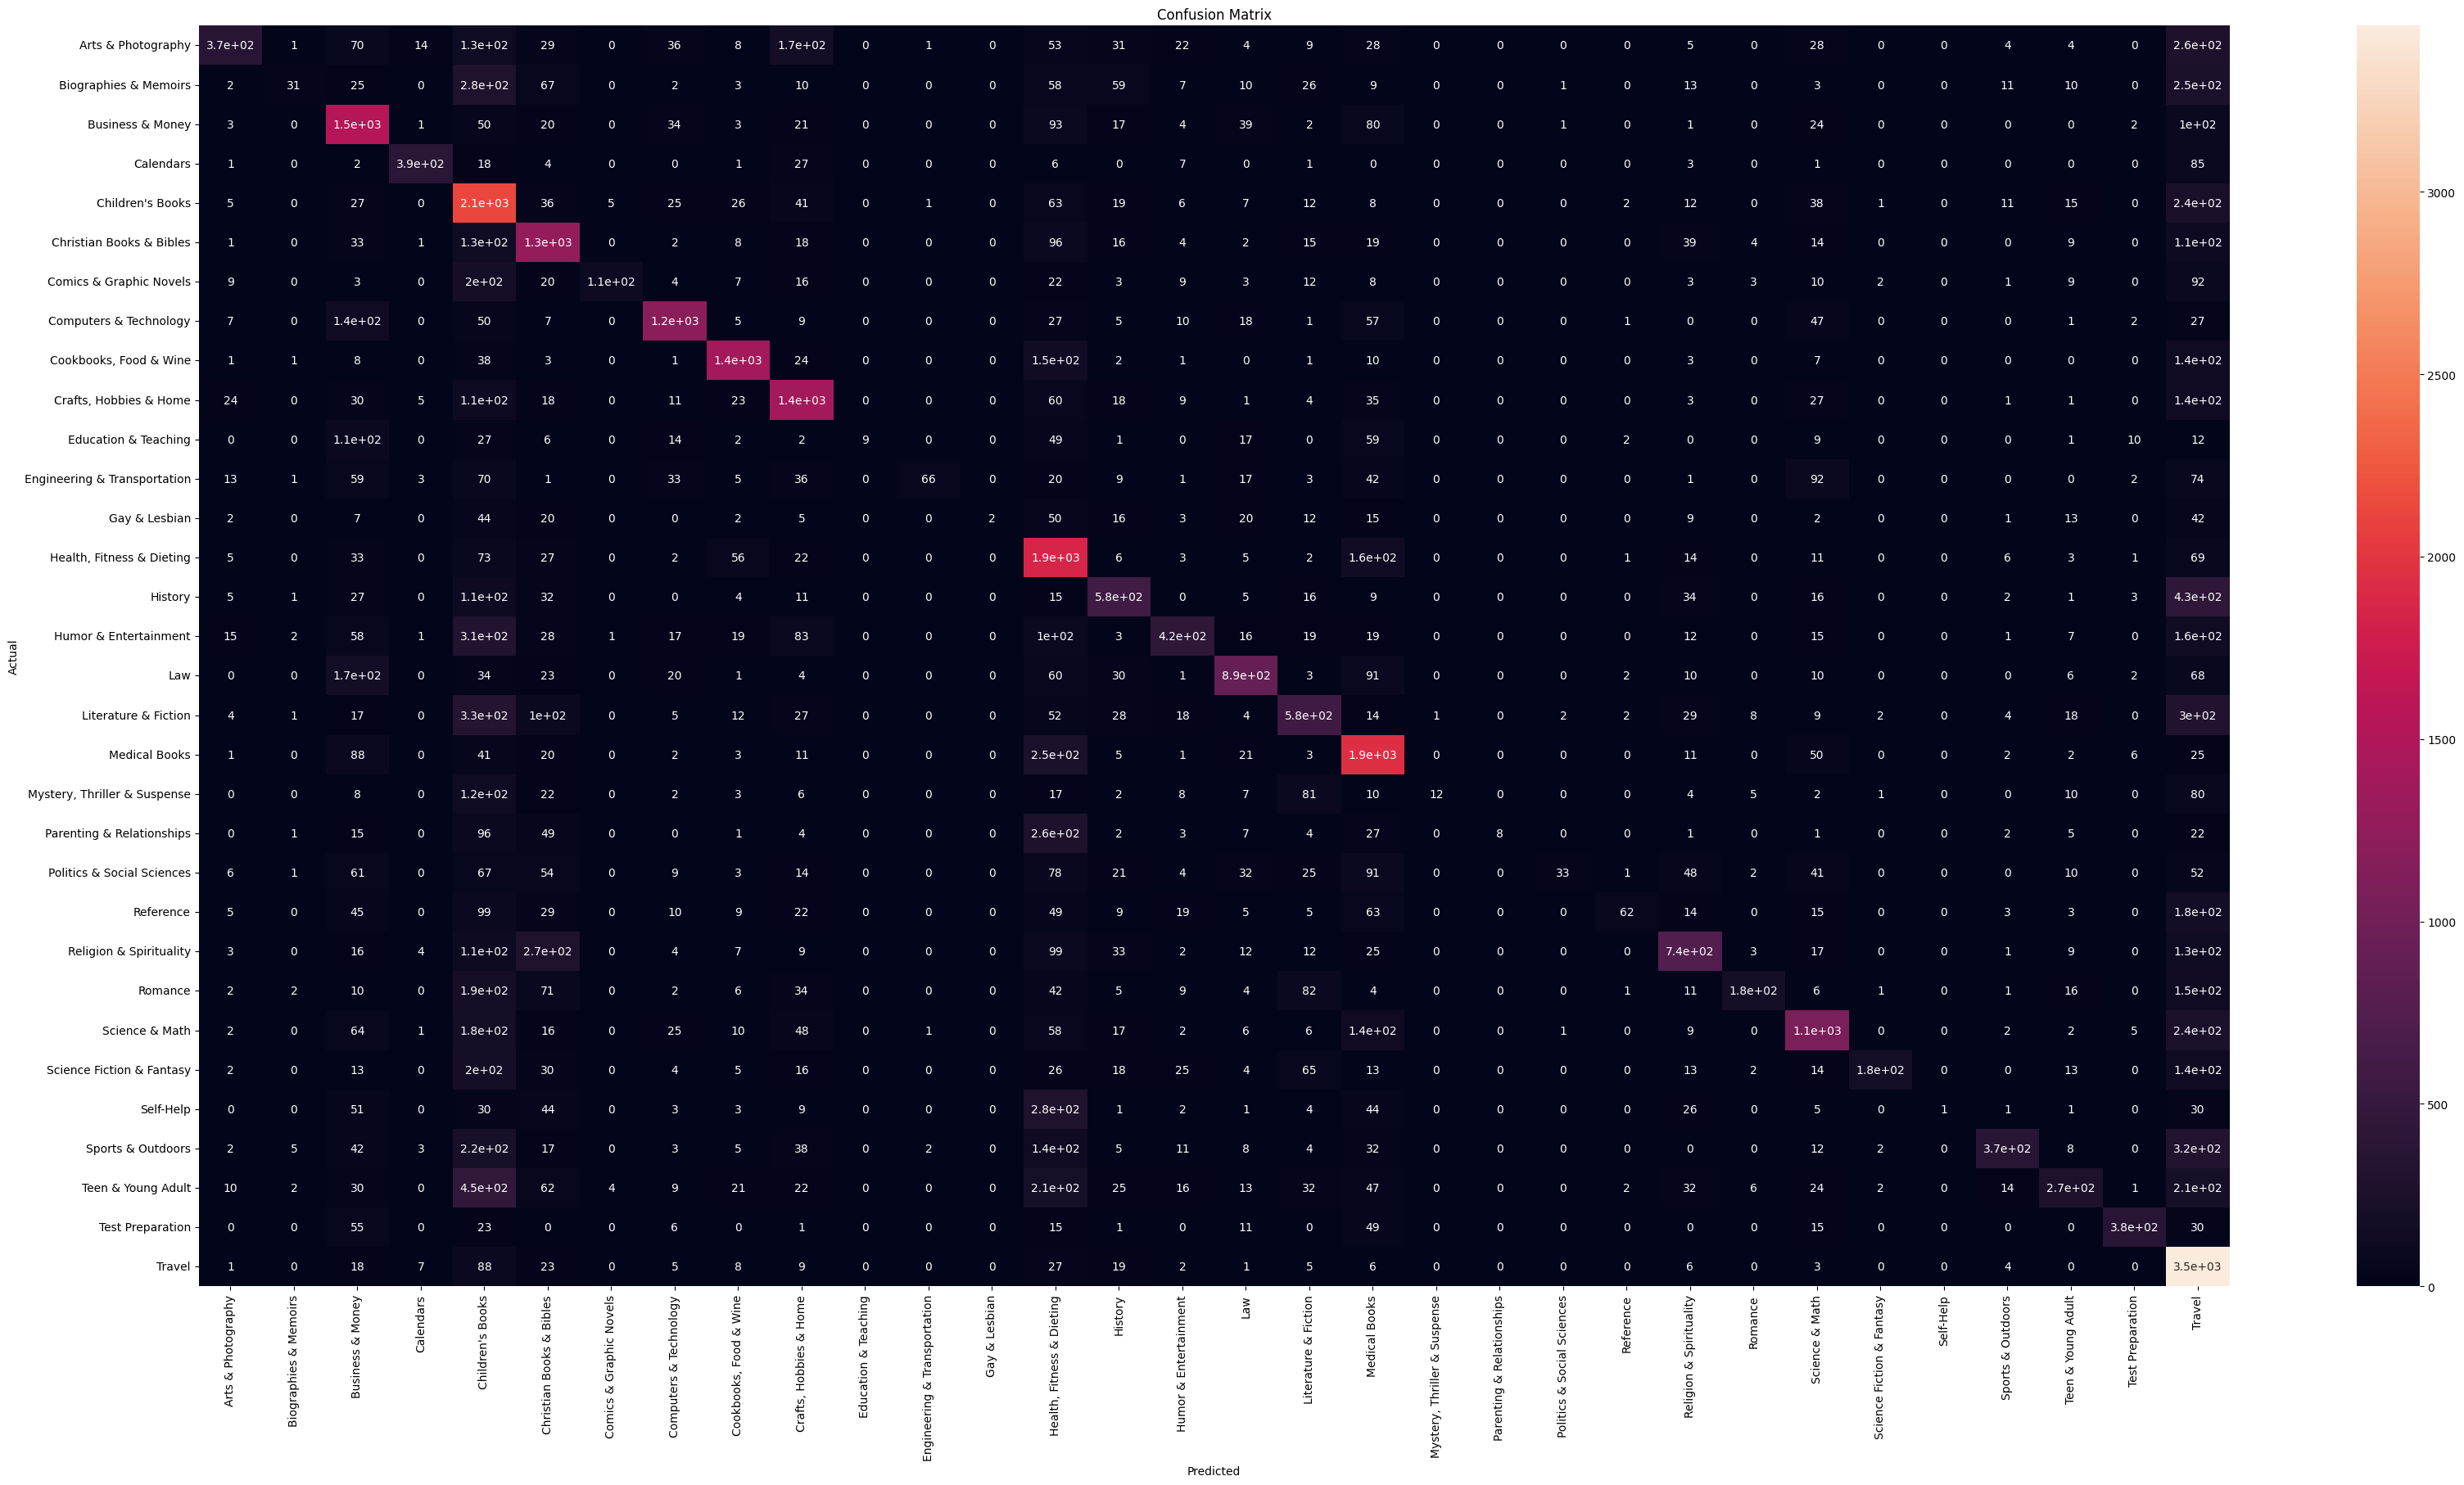

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(40, 20))
sns.heatmap(cm, annot=True,  xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
dfs['books']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Year-Of-Publication-str
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2002
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,2001
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,1991
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,1999
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,1999
...,...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,1988
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,1991
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,2004
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,1996


In [ ]:
request = list(dfs['books'].iloc[:100, 0])
request

['0195153448',
 '0002005018',
 '0060973129',
 '0374157065',
 '0393045218',
 '0399135782',
 '0425176428',
 '0671870432',
 '0679425608',
 '074322678X',
 '0771074670',
 '080652121X',
 '0887841740',
 '1552041778',
 '1558746218',
 '1567407781',
 '1575663937',
 '1881320189',
 '0440234743',
 '0452264464',
 '0609804618',
 '1841721522',
 '1879384493',
 '0061076031',
 '0439095026',
 '0689821166',
 '0971880107',
 '0345402871',
 '0345417623',
 '0684823802',
 '0375759778',
 '0425163091',
 '3404921038',
 '3442353866',
 '3442410665',
 '3442446937',
 '0375406328',
 '0446310786',
 '0449005615',
 '0060168013',
 '038078243X',
 '055321215X',
 '067176537X',
 '0061099686',
 '0553582909',
 '0671888587',
 '0553582747',
 '0425182908',
 '042518630X',
 '0440223571',
 '0812523873',
 '0842342702',
 '0440225701',
 '0060914068',
 '0156047624',
 '0245542957',
 '0380715899',
 '0553280333',
 '0961769947',
 '0964778319',
 '0671623249',
 '0679810307',
 '0679865691',
 '2070423204',
 '0345260317',
 '0394743741',
 '04251177

In [ ]:
import requests

url = f"https://www.googleapis.com/books/v1/volumes?q=isbn:{request[0]}"
print(url)

https://www.googleapis.com/books/v1/volumes?q=isbn:0195153448


In [ ]:
df = pd.DataFrame()

In [ ]:
dfs['books_genre'].shape

(207572, 3)

In [ ]:
split = sklearn.model_selection.train_test_split(np.arange(dfs['books_genre'].shape[0]), test_size=0.2, random_state=42)
split

[array([  6051,    206, 136056, ..., 131932, 146867, 121958]),
 array([ 97741,  51100,  11359, ..., 108571,  19964,  81556])]

In [ ]:
# limfeat = 1000
# emblen = 128
# seqlen = 100
# numclass = len(classes)

In [ ]:
# l_vectorize = keras.layers.TextVectorization(
#     standardize=lambda x: tf.strings.lower(x),
#     max_tokens = limfeat,
#     output_mode="int",
#     output_sequence_length=seqlen
# )
# l_vectorize

In [ ]:
# l_vectorize.adapt(tf.convert_to_tensor(dfs['books_genre']['title']))

In [ ]:
# def make_model():
#     from keras import layers
#     inputs = keras.Input(shape=(1,), dtype=tf.string, name='text')
#     x = l_vectorize(inputs)
#     x = keras_nlp.layers.TokenAndPositionEmbedding(100, 100, 128)(x)
#     for i in range(5):
#         x = keras_nlp.layers.TransformerEncoder(64, 8)(x)
#     x = keras.layers.Reshape((12800,))(x)
#     predictions = layers.Dense(numclass, activation="softmax", name="predictions")(x)
#     model = keras.Model(inputs, predictions)
#     model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#     return model

In [ ]:
# model = make_model()
# model.summary()

In [ ]:
# dfs['books_genre']

In [ ]:
# tf.convert_to_tensor(dfs['books_genre']['title']),
# tf.convert_to_tensor(dfs['books_genre']['class'])

In [ ]:
# callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
# model.fit(tf.convert_to_tensor(dfs['books_genre']['title'][split[0]]), tf.convert_to_tensor(dfs['books_genre']['class'][split[0]]), epochs=60, batch_size=1024, validation_split=0.2)

#ML

In [ ]:
dfs['books']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Year-Of-Publication-str
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2002
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,2001
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,1991
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,1999
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,1999
...,...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,1988
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,1991
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,2004
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,1996


In [ ]:
dfs['ratings_merged']

,User-ID,ISBN,Book-Rating,Age,lat,lon,country,state
0,276737,0600570967,6,14.0,-33.869844,151.208285,Australia,New South Wales
1,276747,0060517794,9,25.0,41.661256,-91.529911,United States,Iowa
2,276747,0671537458,9,25.0,41.661256,-91.529911,United States,Iowa
3,276747,0679776818,8,25.0,41.661256,-91.529911,United States,Iowa
4,276747,0943066433,7,25.0,41.661256,-91.529911,United States,Iowa
...,...,...,...,...,...,...,...,...
284469,276681,0609806491,7,43.0,41.875562,-87.624421,United States,Illinois
284470,276681,1931333246,10,43.0,41.875562,-87.624421,United States,Illinois
284471,276709,0515107662,10,38.0,39.530917,-80.343418,United States,West Virginia
284472,276721,0590442449,10,14.0,41.823989,-71.412834,United States,Rhode Island


In [ ]:
np.sum(dfs['ratings_merged'].isnull(), axis=0)

,0
User-ID,0
ISBN,0
Book-Rating,0
Age,0
lat,0
lon,0
country,0
state,0


In [ ]:
for i in ['', 'out']:
    dfs['merged_users_rating_with' + i] = dfs['merged_users']

In [ ]:
np.sum(dfs['books'].isnull(), axis=0)

,0
ISBN,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-S,0
Image-URL-M,0
Image-URL-L,0
Year-Of-Publication-str,0


In [ ]:
dfs['books']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Year-Of-Publication-str
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2002
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,2001
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,1991
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,1999
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,1999
...,...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,1988
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,1991
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,2004
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,1996


In [ ]:
dfs['books'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 266740 entries, 0 to 271359
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ISBN                     266740 non-null  object
 1   Book-Title               266740 non-null  object
 2   Book-Author              266740 non-null  object
 3   Year-Of-Publication      266740 non-null  int64 
 4   Publisher                266740 non-null  object
 5   Image-URL-S              266740 non-null  object
 6   Image-URL-M              266740 non-null  object
 7   Image-URL-L              266740 non-null  object
 8   Year-Of-Publication-str  266740 non-null  object
dtypes: int64(1), object(8)
memory usage: 20.4+ MB


In [ ]:
dfs['ratings_merged'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284474 entries, 0 to 284473
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   User-ID      284474 non-null  int64  
 1   ISBN         284474 non-null  object 
 2   Book-Rating  284474 non-null  int64  
 3   Age          284474 non-null  float64
 4   lat          284474 non-null  float64
 5   lon          284474 non-null  float64
 6   country      284474 non-null  object 
 7   state        284474 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 17.4+ MB


In [ ]:
dfs['merged_all'] = pd.merge(dfs['ratings_merged'], dfs['books'], on='ISBN')
dfs['merged_all']

,User-ID,ISBN,Book-Rating,Age,lat,lon,country,state,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Year-Of-Publication-str
0,276747,0060517794,9,25.0,41.661256,-91.529911,United States,Iowa,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,2003
1,276747,0671537458,9,25.0,41.661256,-91.529911,United States,Iowa,Waiting to Exhale,Terry McMillan,1995,Pocket,http://images.amazon.com/images/P/0671537458.0...,http://images.amazon.com/images/P/0671537458.0...,http://images.amazon.com/images/P/0671537458.0...,1995
2,276747,0679776818,8,25.0,41.661256,-91.529911,United States,Iowa,Birdsong: A Novel of Love and War,Sebastian Faulks,1997,Vintage Books USA,http://images.amazon.com/images/P/0679776818.0...,http://images.amazon.com/images/P/0679776818.0...,http://images.amazon.com/images/P/0679776818.0...,1997
3,276747,0943066433,7,25.0,41.661256,-91.529911,United States,Iowa,How to Deal With Difficult People,Rick Brinkman,1995,Careertrack Inc.,http://images.amazon.com/images/P/0943066433.0...,http://images.amazon.com/images/P/0943066433.0...,http://images.amazon.com/images/P/0943066433.0...,1995
4,276747,1885408226,7,25.0,41.661256,-91.529911,United States,Iowa,The Golden Rule of Schmoozing,Aye Jaye,1998,Listen &amp; Live Audio,http://images.amazon.com/images/P/1885408226.0...,http://images.amazon.com/images/P/1885408226.0...,http://images.amazon.com/images/P/1885408226.0...,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250671,276681,0446677450,8,43.0,41.875562,-87.624421,United States,Illinois,"Rich Dad, Poor Dad: What the Rich Teach Their ...",Robert T. Kiyosaki,2000,Warner Books,http://images.amazon.com/images/P/0446677450.0...,http://images.amazon.com/images/P/0446677450.0...,http://images.amazon.com/images/P/0446677450.0...,2000
250672,276681,0609806491,7,43.0,41.875562,-87.624421,United States,Illinois,The Zen of Proposal Writing: An Expert's Stres...,Kitta Reeds,2002,Three Rivers Press (CA),http://images.amazon.com/images/P/0609806491.0...,http://images.amazon.com/images/P/0609806491.0...,http://images.amazon.com/images/P/0609806491.0...,2002
250673,276681,1931333246,10,43.0,41.875562,-87.624421,United States,Illinois,Chorus,Kurt Messick,2003,Dry Bones Press,http://images.amazon.com/images/P/1931333246.0...,http://images.amazon.com/images/P/1931333246.0...,http://images.amazon.com/images/P/1931333246.0...,2003
250674,276709,0515107662,10,38.0,39.530917,-80.343418,United States,West Virginia,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,1996


In [ ]:
np.array(dfs['merged_all'].groupby('User-ID').size() >= 10)

array([False, False, False, ..., False,  True, False])

In [ ]:
dfs['merged_all_with_few_users'] = dfs['merged_all']
dfs['merged_all'] = dfs['merged_all'].groupby('User-ID').filter(lambda x: x.shape[0] >= 10)
dfs['merged_all']
#  [np.array(dfs['merged_all'].groupby('User-ID').size() >= 10)]

,User-ID,ISBN,Book-Rating,Age,lat,lon,country,state,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Year-Of-Publication-str
27,276822,0060096195,10,11.0,51.045606,-114.057541,Canada,Alberta,The Boy Next Door,Meggin Cabot,2002,Avon Trade,http://images.amazon.com/images/P/0060096195.0...,http://images.amazon.com/images/P/0060096195.0...,http://images.amazon.com/images/P/0060096195.0...,2002
28,276822,0141310340,9,11.0,51.045606,-114.057541,Canada,Alberta,Skin and Other Stories (Now in Speak!),Roald Dahl,2002,Puffin Books,http://images.amazon.com/images/P/0141310340.0...,http://images.amazon.com/images/P/0141310340.0...,http://images.amazon.com/images/P/0141310340.0...,2002
29,276822,0142302198,10,11.0,51.045606,-114.057541,Canada,Alberta,Growing Wings,Laurel Winter,2002,Puffin Books,http://images.amazon.com/images/P/0142302198.0...,http://images.amazon.com/images/P/0142302198.0...,http://images.amazon.com/images/P/0142302198.0...,2002
30,276822,0156006065,9,11.0,51.045606,-114.057541,Canada,Alberta,The Riddle of Scheherazade: And Other Amazing ...,Raymond Smullyan,1998,Harvest Books,http://images.amazon.com/images/P/0156006065.0...,http://images.amazon.com/images/P/0156006065.0...,http://images.amazon.com/images/P/0156006065.0...,1998
31,276822,0375821813,9,11.0,51.045606,-114.057541,Canada,Alberta,Hoot (Newbery Honor Book),CARL HIAASEN,2002,Knopf Books for Young Readers,http://images.amazon.com/images/P/0375821813.0...,http://images.amazon.com/images/P/0375821813.0...,http://images.amazon.com/images/P/0375821813.0...,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250669,276681,0140290788,9,43.0,41.875562,-87.624421,United States,Illinois,Time Out Chicago (Time Out Chicago),Time Out,2000,Penguin Books,http://images.amazon.com/images/P/0140290788.0...,http://images.amazon.com/images/P/0140290788.0...,http://images.amazon.com/images/P/0140290788.0...,2000
250670,276681,0399144463,8,43.0,41.875562,-87.624421,United States,Illinois,Who Moved My Cheese? An Amazing Way to Deal wi...,Spencer Johnson,1998,Putnam Pub Group (Paper),http://images.amazon.com/images/P/0399144463.0...,http://images.amazon.com/images/P/0399144463.0...,http://images.amazon.com/images/P/0399144463.0...,1998
250671,276681,0446677450,8,43.0,41.875562,-87.624421,United States,Illinois,"Rich Dad, Poor Dad: What the Rich Teach Their ...",Robert T. Kiyosaki,2000,Warner Books,http://images.amazon.com/images/P/0446677450.0...,http://images.amazon.com/images/P/0446677450.0...,http://images.amazon.com/images/P/0446677450.0...,2000
250672,276681,0609806491,7,43.0,41.875562,-87.624421,United States,Illinois,The Zen of Proposal Writing: An Expert's Stres...,Kitta Reeds,2002,Three Rivers Press (CA),http://images.amazon.com/images/P/0609806491.0...,http://images.amazon.com/images/P/0609806491.0...,http://images.amazon.com/images/P/0609806491.0...,2002


In [ ]:
np.all(dfs['merged_all'].groupby('User-ID').size() >= 10)

True

In [ ]:
dfs['merged_all_with_images'] = dfs['merged_all']
# dfs['merged_all'] = dfs['merged_all'].loc[:, np.array(~pd.Series(dfs['merged_all'].columns).str.match('(^Image-URL-[A-Z]$)|(^.*-str$)|(^.*-Title$)'))]
dfs['merged_all'] = dfs['merged_all'].loc[:, ["Age", "lat", "lon", "country", "state", "Book-Author", "Year-Of-Publication", "Publisher"]]

In [ ]:
dfs['merged_all']

,Age,lat,lon,country,state,Book-Author,Year-Of-Publication,Publisher
27,11.0,51.045606,-114.057541,Canada,Alberta,Meggin Cabot,2002,Avon Trade
28,11.0,51.045606,-114.057541,Canada,Alberta,Roald Dahl,2002,Puffin Books
29,11.0,51.045606,-114.057541,Canada,Alberta,Laurel Winter,2002,Puffin Books
30,11.0,51.045606,-114.057541,Canada,Alberta,Raymond Smullyan,1998,Harvest Books
31,11.0,51.045606,-114.057541,Canada,Alberta,CARL HIAASEN,2002,Knopf Books for Young Readers
...,...,...,...,...,...,...,...,...
250669,43.0,41.875562,-87.624421,United States,Illinois,Time Out,2000,Penguin Books
250670,43.0,41.875562,-87.624421,United States,Illinois,Spencer Johnson,1998,Putnam Pub Group (Paper)
250671,43.0,41.875562,-87.624421,United States,Illinois,Robert T. Kiyosaki,2000,Warner Books
250672,43.0,41.875562,-87.624421,United States,Illinois,Kitta Reeds,2002,Three Rivers Press (CA)


In [ ]:
dfs['merged_all'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 181484 entries, 27 to 250673
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  181484 non-null  float64
 1   lat                  181484 non-null  float64
 2   lon                  181484 non-null  float64
 3   country              181484 non-null  object 
 4   state                181484 non-null  object 
 5   Book-Author          181484 non-null  object 
 6   Year-Of-Publication  181484 non-null  int64  
 7   Publisher            181484 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 12.5+ MB


In [ ]:
dv = sklearn.feature_extraction.DictVectorizer()
ds = dv.fit_transform(dfs['merged_all'].loc[:, 'Publisher':'Publisher'].to_dict('records'))
ds

<181484x7618 sparse matrix of type '<class 'numpy.float64'>'
	with 181484 stored elements in Compressed Sparse Row format>

In [ ]:
ds[0].data

array([1.])

In [ ]:
dfs['merged_all']

,Age,lat,lon,country,state,Book-Author,Year-Of-Publication,Publisher
27,11.0,51.045606,-114.057541,Canada,Alberta,Meggin Cabot,2002,Avon Trade
28,11.0,51.045606,-114.057541,Canada,Alberta,Roald Dahl,2002,Puffin Books
29,11.0,51.045606,-114.057541,Canada,Alberta,Laurel Winter,2002,Puffin Books
30,11.0,51.045606,-114.057541,Canada,Alberta,Raymond Smullyan,1998,Harvest Books
31,11.0,51.045606,-114.057541,Canada,Alberta,CARL HIAASEN,2002,Knopf Books for Young Readers
...,...,...,...,...,...,...,...,...
250669,43.0,41.875562,-87.624421,United States,Illinois,Time Out,2000,Penguin Books
250670,43.0,41.875562,-87.624421,United States,Illinois,Spencer Johnson,1998,Putnam Pub Group (Paper)
250671,43.0,41.875562,-87.624421,United States,Illinois,Robert T. Kiyosaki,2000,Warner Books
250672,43.0,41.875562,-87.624421,United States,Illinois,Kitta Reeds,2002,Three Rivers Press (CA)


In [ ]:
dfs['merged_all_with_images'].groupby('User-ID').count()

,ISBN,Book-Rating,Age,lat,lon,country,state,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Year-Of-Publication-str
User-ID,,,,,,,,,,,,,,,
242,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
254,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57
388,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
392,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
503,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278221,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
278356,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
278390,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12


In [ ]:
_z = dfs['merged_all_with_images'].loc[dfs['merged_all_with_images']['User-ID'] == 278851]
_z

,User-ID,ISBN,Book-Rating,Age,lat,lon,country,state,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Year-Of-Publication-str
1303,278851,0380865610,5,33.0,32.776272,-96.796856,United States,Texas,Gremlins,George Gipe,1984,Avon,http://images.amazon.com/images/P/0380865610.0...,http://images.amazon.com/images/P/0380865610.0...,http://images.amazon.com/images/P/0380865610.0...,1984
1304,278851,0439050006,5,33.0,32.776272,-96.796856,United States,Texas,Captain Underpants and the Wrath of the Wicked...,Dav Pilkey,2001,Blue Sky Press (AZ),http://images.amazon.com/images/P/0439050006.0...,http://images.amazon.com/images/P/0439050006.0...,http://images.amazon.com/images/P/0439050006.0...,2001
1305,278851,0440486599,5,33.0,32.776272,-96.796856,United States,Texas,"Then Again, Maybe I Won't",JUDY BLUME,1986,Yearling,http://images.amazon.com/images/P/0440486599.0...,http://images.amazon.com/images/P/0440486599.0...,http://images.amazon.com/images/P/0440486599.0...,1986
1306,278851,067161746X,7,33.0,32.776272,-96.796856,United States,Texas,The Bachelor Home Companion: A Practical Guide...,P.J. O'Rourke,1987,Pocket Books,http://images.amazon.com/images/P/067161746X.0...,http://images.amazon.com/images/P/067161746X.0...,http://images.amazon.com/images/P/067161746X.0...,1987
1307,278851,0767907566,5,33.0,32.776272,-96.796856,United States,Texas,All Elevations Unknown: An Adventure in the He...,Sam Lightner,2001,Broadway Books,http://images.amazon.com/images/P/0767907566.0...,http://images.amazon.com/images/P/0767907566.0...,http://images.amazon.com/images/P/0767907566.0...,2001
1308,278851,0789721260,5,33.0,32.776272,-96.796856,United States,Texas,WebClasses From Scratch,Jesse Liberty,1999,Que,http://images.amazon.com/images/P/0789721260.0...,http://images.amazon.com/images/P/0789721260.0...,http://images.amazon.com/images/P/0789721260.0...,1999
1309,278851,0843106743,7,33.0,32.776272,-96.796856,United States,Texas,Murphy's Law Book Two: More Reasons Why Things...,Arthur Bloch,1980,Putnam Pub Group,http://images.amazon.com/images/P/0843106743.0...,http://images.amazon.com/images/P/0843106743.0...,http://images.amazon.com/images/P/0843106743.0...,1980
1310,278851,0884159221,7,33.0,32.776272,-96.796856,United States,Texas,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,1985,Lone Star Books,http://images.amazon.com/images/P/0884159221.0...,http://images.amazon.com/images/P/0884159221.0...,http://images.amazon.com/images/P/0884159221.0...,1985
1311,278851,0894803700,5,33.0,32.776272,-96.796856,United States,Texas,"14,000 Things to Be Happy About",Barbara Ann Kipfer,1990,Workman Publishing,http://images.amazon.com/images/P/0894803700.0...,http://images.amazon.com/images/P/0894803700.0...,http://images.amazon.com/images/P/0894803700.0...,1990
1312,278851,0912333022,7,33.0,32.776272,-96.796856,United States,Texas,The Are You Being Served? Stories: 'Camping In...,Jeremy Lloyd,1997,Kqed Books,http://images.amazon.com/images/P/0912333022.0...,http://images.amazon.com/images/P/0912333022.0...,http://images.amazon.com/images/P/0912333022.0...,1997


In [ ]:
_z['Book-Rating'].describe()

,Book-Rating
count,14.000000
mean,6.500000
std,1.556624
min,5.000000
25%,5.000000
50%,7.000000
75%,7.000000
max,10.000000


In [ ]:
(1 - (_z['country'].groupby(_z['country']).count() / _z['country'].size).fillna(0))

,country
country,
United States,0.0


In [ ]:
1 - (_z['country'].groupby(_z['country']).count() / _z['country'].size)

,country
country,
United States,0.0


In [ ]:
dfs['merged_all_with_images'].groupby(['country', 'User-ID']).size()

country    User-ID
Argentina  101550      60
           156876      12
Australia  10199       15
           15957       17
           16161       41
                     ... 
中国         81263       42
           84900       14
           88693      169
           136465      18
           215143      14
Length: 4518, dtype: int64

In [ ]:
dfs['merged_all_with_images'].groupby(['country', 'User-ID']).size() / dfs['merged_all_with_images'].groupby('User-ID').size()

country    User-ID
Argentina  101550     1.0
           156876     1.0
Australia  10199      1.0
           15957      1.0
           16161      1.0
                     ... 
中国         81263      1.0
           84900      1.0
           88693      1.0
           136465     1.0
           215143     1.0
Length: 4518, dtype: float64

In [ ]:
_z.shape[0]

14

In [ ]:
_z.groupby('country').size() / _z.shape[0]

,0
country,
United States,1.0


In [ ]:
((dfs['merged_all_with_images'].groupby(['country', 'User-ID']).size() / dfs['merged_all_with_images'].groupby('User-ID').size()).sub(_z.groupby('country').size() / _z.shape[0], fill_value=0)).groupby(level=1).sum()

,0
User-ID,
242,1.0
254,0.0
388,0.0
392,1.0
503,0.0
...,...
278221,1.0
278356,0.0
278390,0.0


In [ ]:
np.abs(dfs['merged_all_with_images'].groupby('User-ID')['Year-Of-Publication'].mean() - _z['Year-Of-Publication'].mean())

,Year-Of-Publication
User-ID,
242,3.071429
254,5.431078
388,2.336134
392,2.845238
503,4.238095
...,...
278221,3.404762
278356,1.321429
278390,6.821429


In [ ]:
# ((dfs['merged_all_with_images'].groupby(['User-ID'])['Year-Of-Publication']() / dfs['merged_all_with_images'].groupby('User-ID').size()).sub(_z.groupby('Year-Of-Publication').size() / _z.shape[0], fill_value=0)).groupby(level=1).sum()

In [ ]:
dfs['merged_all_with_images'].groupby(['country', 'User-ID']).size().loc[:, 215143]

,0
country,
中国,14


In [ ]:
dfs['merged_all_with_images'].groupby('User-ID').size().loc[215143]

14

In [ ]:
(dfs['merged_all_with_images'].groupby(['country', 'User-ID']).size() / dfs['merged_all_with_images'].groupby('User-ID').size()).loc[:, 215143]

,0
country,
中国,1.0


In [ ]:
dfs['merged_all_with_images']

,User-ID,ISBN,Book-Rating,Age,lat,lon,country,state,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Year-Of-Publication-str
27,276822,0060096195,10,11.0,51.045606,-114.057541,Canada,Alberta,The Boy Next Door,Meggin Cabot,2002,Avon Trade,http://images.amazon.com/images/P/0060096195.0...,http://images.amazon.com/images/P/0060096195.0...,http://images.amazon.com/images/P/0060096195.0...,2002
28,276822,0141310340,9,11.0,51.045606,-114.057541,Canada,Alberta,Skin and Other Stories (Now in Speak!),Roald Dahl,2002,Puffin Books,http://images.amazon.com/images/P/0141310340.0...,http://images.amazon.com/images/P/0141310340.0...,http://images.amazon.com/images/P/0141310340.0...,2002
29,276822,0142302198,10,11.0,51.045606,-114.057541,Canada,Alberta,Growing Wings,Laurel Winter,2002,Puffin Books,http://images.amazon.com/images/P/0142302198.0...,http://images.amazon.com/images/P/0142302198.0...,http://images.amazon.com/images/P/0142302198.0...,2002
30,276822,0156006065,9,11.0,51.045606,-114.057541,Canada,Alberta,The Riddle of Scheherazade: And Other Amazing ...,Raymond Smullyan,1998,Harvest Books,http://images.amazon.com/images/P/0156006065.0...,http://images.amazon.com/images/P/0156006065.0...,http://images.amazon.com/images/P/0156006065.0...,1998
31,276822,0375821813,9,11.0,51.045606,-114.057541,Canada,Alberta,Hoot (Newbery Honor Book),CARL HIAASEN,2002,Knopf Books for Young Readers,http://images.amazon.com/images/P/0375821813.0...,http://images.amazon.com/images/P/0375821813.0...,http://images.amazon.com/images/P/0375821813.0...,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250669,276681,0140290788,9,43.0,41.875562,-87.624421,United States,Illinois,Time Out Chicago (Time Out Chicago),Time Out,2000,Penguin Books,http://images.amazon.com/images/P/0140290788.0...,http://images.amazon.com/images/P/0140290788.0...,http://images.amazon.com/images/P/0140290788.0...,2000
250670,276681,0399144463,8,43.0,41.875562,-87.624421,United States,Illinois,Who Moved My Cheese? An Amazing Way to Deal wi...,Spencer Johnson,1998,Putnam Pub Group (Paper),http://images.amazon.com/images/P/0399144463.0...,http://images.amazon.com/images/P/0399144463.0...,http://images.amazon.com/images/P/0399144463.0...,1998
250671,276681,0446677450,8,43.0,41.875562,-87.624421,United States,Illinois,"Rich Dad, Poor Dad: What the Rich Teach Their ...",Robert T. Kiyosaki,2000,Warner Books,http://images.amazon.com/images/P/0446677450.0...,http://images.amazon.com/images/P/0446677450.0...,http://images.amazon.com/images/P/0446677450.0...,2000
250672,276681,0609806491,7,43.0,41.875562,-87.624421,United States,Illinois,The Zen of Proposal Writing: An Expert's Stres...,Kitta Reeds,2002,Three Rivers Press (CA),http://images.amazon.com/images/P/0609806491.0...,http://images.amazon.com/images/P/0609806491.0...,http://images.amazon.com/images/P/0609806491.0...,2002


In [ ]:
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [ ]:
dfs['merged_all_with_images'].loc[:2, 'lat']

,lat


In [ ]:
dfs['merged_all_with_images'].loc[250676-2:, 'lat']

,lat


In [ ]:
haversine(dfs['merged_all_with_images'].loc[:1, 'lat'], dfs['merged_all_with_images'].loc[:1, 'lon'],dfs['merged_all_with_images'].loc[250676-2:, 'lat'], dfs['merged_all_with_images'].loc[250676-2:, 'lon'],)

array([], dtype=float64)

In [ ]:
_zz = dfs['merged_all_with_images'].loc[:, ['User-ID', 'lat', 'lon']].merge(_z.loc[:, ['lat', 'lon']], how='cross')
_zz['distance'] = haversine(_zz['lat_x'], _zz['lon_x'], _zz['lat_y'], _zz['lon_y'])
_zz = (_zz.groupby('User-ID').apply(lambda x: stats.gmean(x['distance'])))

<ipython-input-232-ba050857df11>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  _zz = (_zz.groupby('User-ID').apply(lambda x: stats.gmean(x['distance'])))


In [ ]:
pd.DataFrame([_zz, _zz]).T.sum(axis=1)

,0
User-ID,
242,16785.181730
254,2780.652399
388,1984.592543
392,16670.530789
503,3504.026250
...,...
278221,3972.837001
278356,1410.349843
278390,2502.542799


In [ ]:
dfs['merged_all_with_images'].groupby('User-ID')['Book-Rating'].mean()

,Book-Rating
User-ID,
242,8.650000
254,7.771930
388,7.294118
392,6.916667
503,9.400000
...,...
278221,8.875000
278356,8.138889
278390,7.500000


In [ ]:
dfs['merged_all_with_images'].groupby('User-ID')['Book-Rating'].std()

,Book-Rating
User-ID,
242,1.308877
254,1.512065
388,2.023756
392,1.928652
503,1.055597
...,...
278221,1.190999
278356,1.742786
278390,1.507557


In [ ]:
dfs['merged_all_with_images']

,User-ID,ISBN,Book-Rating,Age,lat,lon,country,state,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Year-Of-Publication-str
27,276822,0060096195,10,11.0,51.045606,-114.057541,Canada,Alberta,The Boy Next Door,Meggin Cabot,2002,Avon Trade,http://images.amazon.com/images/P/0060096195.0...,http://images.amazon.com/images/P/0060096195.0...,http://images.amazon.com/images/P/0060096195.0...,2002
28,276822,0141310340,9,11.0,51.045606,-114.057541,Canada,Alberta,Skin and Other Stories (Now in Speak!),Roald Dahl,2002,Puffin Books,http://images.amazon.com/images/P/0141310340.0...,http://images.amazon.com/images/P/0141310340.0...,http://images.amazon.com/images/P/0141310340.0...,2002
29,276822,0142302198,10,11.0,51.045606,-114.057541,Canada,Alberta,Growing Wings,Laurel Winter,2002,Puffin Books,http://images.amazon.com/images/P/0142302198.0...,http://images.amazon.com/images/P/0142302198.0...,http://images.amazon.com/images/P/0142302198.0...,2002
30,276822,0156006065,9,11.0,51.045606,-114.057541,Canada,Alberta,The Riddle of Scheherazade: And Other Amazing ...,Raymond Smullyan,1998,Harvest Books,http://images.amazon.com/images/P/0156006065.0...,http://images.amazon.com/images/P/0156006065.0...,http://images.amazon.com/images/P/0156006065.0...,1998
31,276822,0375821813,9,11.0,51.045606,-114.057541,Canada,Alberta,Hoot (Newbery Honor Book),CARL HIAASEN,2002,Knopf Books for Young Readers,http://images.amazon.com/images/P/0375821813.0...,http://images.amazon.com/images/P/0375821813.0...,http://images.amazon.com/images/P/0375821813.0...,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250669,276681,0140290788,9,43.0,41.875562,-87.624421,United States,Illinois,Time Out Chicago (Time Out Chicago),Time Out,2000,Penguin Books,http://images.amazon.com/images/P/0140290788.0...,http://images.amazon.com/images/P/0140290788.0...,http://images.amazon.com/images/P/0140290788.0...,2000
250670,276681,0399144463,8,43.0,41.875562,-87.624421,United States,Illinois,Who Moved My Cheese? An Amazing Way to Deal wi...,Spencer Johnson,1998,Putnam Pub Group (Paper),http://images.amazon.com/images/P/0399144463.0...,http://images.amazon.com/images/P/0399144463.0...,http://images.amazon.com/images/P/0399144463.0...,1998
250671,276681,0446677450,8,43.0,41.875562,-87.624421,United States,Illinois,"Rich Dad, Poor Dad: What the Rich Teach Their ...",Robert T. Kiyosaki,2000,Warner Books,http://images.amazon.com/images/P/0446677450.0...,http://images.amazon.com/images/P/0446677450.0...,http://images.amazon.com/images/P/0446677450.0...,2000
250672,276681,0609806491,7,43.0,41.875562,-87.624421,United States,Illinois,The Zen of Proposal Writing: An Expert's Stres...,Kitta Reeds,2002,Three Rivers Press (CA),http://images.amazon.com/images/P/0609806491.0...,http://images.amazon.com/images/P/0609806491.0...,http://images.amazon.com/images/P/0609806491.0...,2002


In [ ]:
df = dfs['merged_all_with_images']

In [ ]:
df.groupby('User-ID')['Book-Rating'].mean()

,Book-Rating
User-ID,
242,8.650000
254,7.771930
388,7.294118
392,6.916667
503,9.400000
...,...
278221,8.875000
278356,8.138889
278390,7.500000


In [ ]:
df[df['ISBN'] == '0399144463'].groupby('User-ID')['Book-Rating'].sum()

,Book-Rating
User-ID,
13518,7
16795,7
41084,8
68984,1
78553,9
83637,7
109049,5
112083,9
124474,8


In [ ]:
z = pd.Series({271195: 6})
z.index.name = "User-ID"
z.name="SeriesZ"
z

,SeriesZ
User-ID,
271195,6


In [ ]:
_zz = df.groupby(['User-ID', 'ISBN'])['Book-Rating'].sum().to_frame().join(df.groupby('User-ID')['Book-Rating'].mean(), rsuffix='_mean').join(df.groupby('User-ID')['Book-Rating'].std(), rsuffix='_std')
(_zz['Book-Rating'] - _zz['Book-Rating_mean']).groupby(level=1).sum()

,0
ISBN,
0000913154,0.644654
000104799X,-0.413999
0001048082,-0.587629
0001056107,0.755247
0001360469,2.032258
...,...
B00013AX9E,-0.758865
B0001FZGPI,-0.300000
B0001FZGRQ,0.533333


In [ ]:
df.groupby('User-ID')['Book-Rating'].mean()

,Book-Rating
User-ID,
242,8.650000
254,7.771930
388,7.294118
392,6.916667
503,9.400000
...,...
278221,8.875000
278356,8.138889
278390,7.500000


In [ ]:
df_train, df_c = sklearn.model_selection.train_test_split(dfs['merged_all_with_images'], test_size=0.3, random_state=42)
df_val, df_test = sklearn.model_selection.train_test_split(dfs['merged_all_with_images'], test_size=0.5, random_state=42)

In [ ]:
df_train

,User-ID,ISBN,Book-Rating,Age,lat,lon,country,state,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Year-Of-Publication-str
52849,59189,0679457526,9,33.0,29.758938,-95.367697,United States,Texas,Into Thin Air : A Personal Account of the Moun...,JON KRAKAUER,1997,Villard,http://images.amazon.com/images/P/0679457526.0...,http://images.amazon.com/images/P/0679457526.0...,http://images.amazon.com/images/P/0679457526.0...,1997
75814,85851,0060557257,8,41.0,30.873661,-84.574095,United States,Georgia,Sushi for Beginners,Marian Keyes,2004,HarperTorch,http://images.amazon.com/images/P/0060557257.0...,http://images.amazon.com/images/P/0060557257.0...,http://images.amazon.com/images/P/0060557257.0...,2004
9719,10819,0553262505,7,27.0,37.747857,-84.294654,United States,Kentucky,"A Wizard of Earthsea (Earthsea Trilogy, Book 1)",URSULA K. LE GUIN,1984,Bantam,http://images.amazon.com/images/P/0553262505.0...,http://images.amazon.com/images/P/0553262505.0...,http://images.amazon.com/images/P/0553262505.0...,1984
137941,148798,0786012692,10,54.0,28.611504,-82.056207,United States,Florida,Too Young to Die: Crime Stories : The Best of ...,David Jacobs,2001,Pinnacle Books,http://images.amazon.com/images/P/0786012692.0...,http://images.amazon.com/images/P/0786012692.0...,http://images.amazon.com/images/P/0786012692.0...,2001
129588,138578,014011369X,9,38.0,37.303493,-89.523036,United States,Missouri,"And the Band Played on: Politics, People, and ...",Randy Shilts,1995,Penguin Books,http://images.amazon.com/images/P/014011369X.0...,http://images.amazon.com/images/P/014011369X.0...,http://images.amazon.com/images/P/014011369X.0...,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164474,177432,0812574966,7,33.0,37.692236,-97.337545,United States,Kansas,Vale of the Vole (Xanth),Piers Anthony,2000,Tor Fantasy,http://images.amazon.com/images/P/0812574966.0...,http://images.amazon.com/images/P/0812574966.0...,http://images.amazon.com/images/P/0812574966.0...,2000
142529,153662,0553213156,8,44.0,31.869435,-81.607766,United States,Georgia,Anne of Ingleside (Anne of Green Gables Novels...,L.M. MONTGOMERY,1984,Bantam Classics,http://images.amazon.com/images/P/0553213156.0...,http://images.amazon.com/images/P/0553213156.0...,http://images.amazon.com/images/P/0553213156.0...,1984
181064,196621,0380711923,5,58.0,25.985843,-80.141184,United States,Florida,The Man Who Was Poe (rack),Avi,1991,HarperTrophy,http://images.amazon.com/images/P/0380711923.0...,http://images.amazon.com/images/P/0380711923.0...,http://images.amazon.com/images/P/0380711923.0...,1991
202470,223190,051509465X,9,33.0,30.173419,-95.504686,United States,Texas,Dancing On My Grave Gelsey Kirkland,Gelsey Kirkland,1987,Penguin Putnam~mass,http://images.amazon.com/images/P/051509465X.0...,http://images.amazon.com/images/P/051509465X.0...,http://images.amazon.com/images/P/051509465X.0...,1987


In [ ]:
df_test

,User-ID,ISBN,Book-Rating,Age,lat,lon,country,state,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Year-Of-Publication-str
175456,189392,0060194790,9,26.0,43.074761,-89.383761,United States,Wisconsin,Waiting : The True Confessions of a Waitress,Debra Ginsberg,2000,HarperCollins Publishers,http://images.amazon.com/images/P/0060194790.0...,http://images.amazon.com/images/P/0060194790.0...,http://images.amazon.com/images/P/0060194790.0...,2000
121262,129074,0380709511,8,51.0,33.952847,-84.549615,United States,Georgia,Death of a Hollow Man,Caroline Graham,1991,Harper Mass Market Paperbacks (Mm),http://images.amazon.com/images/P/0380709511.0...,http://images.amazon.com/images/P/0380709511.0...,http://images.amazon.com/images/P/0380709511.0...,1991
224659,245410,0671001795,7,28.0,29.424600,-98.495141,United States,Texas,Two for the Dough,Janet Evanovich,1996,Pocket,http://images.amazon.com/images/P/0671001795.0...,http://images.amazon.com/images/P/0671001795.0...,http://images.amazon.com/images/P/0671001795.0...,1996
187720,204864,0679452206,10,47.0,34.267740,-118.753807,United States,California,Where the Truth Lies : A Novel,RUPERT HOLMES,2003,Random House,http://images.amazon.com/images/P/0679452206.0...,http://images.amazon.com/images/P/0679452206.0...,http://images.amazon.com/images/P/0679452206.0...,2003
248793,274199,0671878670,8,26.0,45.420878,-75.690111,Canada,Ontario,DID YOU SAY CHICKS,Esther Friesner,1998,Baen,http://images.amazon.com/images/P/0671878670.0...,http://images.amazon.com/images/P/0671878670.0...,http://images.amazon.com/images/P/0671878670.0...,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207359,227836,0373802056,9,30.0,33.959768,-83.376398,United States,Georgia,The Wizard's Ward (Luna),Deborah Hale,2004,Luna,http://images.amazon.com/images/P/0373802056.0...,http://images.amazon.com/images/P/0373802056.0...,http://images.amazon.com/images/P/0373802056.0...,2004
221720,242409,0375700374,5,23.0,50.424873,1.595289,France,Hauts-de-France,The Death of the Banker : The Decline and Fall...,RON CHERNOW,1997,Vintage,http://images.amazon.com/images/P/0375700374.0...,http://images.amazon.com/images/P/0375700374.0...,http://images.amazon.com/images/P/0375700374.0...,1997
60135,67840,0671739441,8,50.0,29.758938,-95.367697,United States,Texas,MINE : MINE,Robert McCammon,1991,Pocket,http://images.amazon.com/images/P/0671739441.0...,http://images.amazon.com/images/P/0671739441.0...,http://images.amazon.com/images/P/0671739441.0...,1991
119464,127171,0060392584,8,36.0,39.101454,-84.512460,United States,Ohio,The Long Hard Road Out of Hell,Marilyn Manson,1998,ReganBooks,http://images.amazon.com/images/P/0060392584.0...,http://images.amazon.com/images/P/0060392584.0...,http://images.amazon.com/images/P/0060392584.0...,1998


In [ ]:
np.argpartition(df.groupby('User-ID')['Book-Rating'].mean(), 2).max()

4517

In [ ]:
_d = dfs['merged_all_with_images']

In [ ]:
_d.groupby('User-ID')['ISBN'].apply(lambda x: np.intersect1d(x, np.array(['3257208634'])).size / x.shape[0])

,ISBN
User-ID,
242,0.05
254,0.00
388,0.00
392,0.00
503,0.00
...,...
278221,0.00
278356,0.00
278390,0.00


In [ ]:
# Based on surprise.prediction_algorithms.knns.KNNWithZScore
class Predict:

    def __init__(self, df: pd.DataFrame, k, mode: str = "user", INCLUDE_EMPTY_PREDICTIONS=False):
        self.df = df
        # In this implementation, k does not specify the maximum number of instances to use as references for the predictions, but rather the maximum number of different users used as reference for the predictions
        self.k = k
        match mode:
            case "user":
                self.userMode = True
            case "item":
                self.userMode = False
            case _:
                raise RuntimeError("Unrecognized similarity calculation mode")
        self.INCLUDE_EMPTY_PREDICTIONS = INCLUDE_EMPTY_PREDICTIONS

    # Configures the weight of each element used for computing similarity
    def configure(self, distWeight, countryWeight, stateWeight, authorWeight, yopWeight, pubWeight):
        self.distWeight = distWeight
        self.countryWeight = countryWeight
        self.stateWeight = stateWeight
        self.authorWeight = authorWeight
        self.yopWeight = yopWeight
        self.pubWeight = pubWeight
        return self


    def similarity(self, userID) -> pd.Series:
        if self.userMode:
            self.userID = userID
            sr = self.df.loc[self.df['User-ID'] == self.userID]

            country = ((self.df.groupby(['country', 'User-ID']).size() / self.df.groupby('User-ID').size()).sub(sr.groupby('country').size() / sr.shape[0], fill_value=0)).groupby(level=1).sum() * self.countryWeight
            state = ((self.df.groupby(['state', 'User-ID']).size() / self.df.groupby('User-ID').size()).sub(sr.groupby('state').size() / sr.shape[0], fill_value=0)).groupby(level=1).sum() * self.stateWeight
            author = ((self.df.groupby(['Book-Author', 'User-ID']).size() / self.df.groupby('User-ID').size()).sub(sr.groupby('Book-Author').size() / sr.shape[0], fill_value=0)).groupby(level=1).sum() * self.authorWeight
            yop = np.abs(self.df.groupby(['User-ID'])['Year-Of-Publication'].mean() - sr['Year-Of-Publication'].mean()) * self.yopWeight
            publisher = ((self.df.groupby(['Publisher', 'User-ID']).size() / self.df.groupby('User-ID').size()).sub(sr.groupby('Publisher').size() / sr.shape[0], fill_value=0)).groupby(level=1).sum() * self.pubWeight
            _zz = self.df.loc[:, ['User-ID', 'lat', 'lon']].merge(_z.loc[:, ['lat', 'lon']], how='cross')
            _zz['distance'] = haversine(_zz['lat_x'], _zz['lon_x'], _zz['lat_y'], _zz['lon_y'])
            dist = _zz.groupby('User-ID').apply(lambda x: stats.gmean(x['distance'])) * self.distWeight

            r = 1/(0.1+pd.DataFrame([country, state, author, yop, publisher, dist]).T.sum(axis=1))
            if not self.INCLUDE_EMPTY_PREDICTIONS:
                r *= self.df.groupby('User-ID')['ISBN'].apply(lambda x: np.intersect1d(x, sr['ISBN']).size / x.shape[0])
            return r

        else:
            raise RuntimeError("Unimplemented")

    def __call__(self, userID: int):
        self.userID = userID
        sr = self.df.loc[self.df['User-ID'] == self.userID]
        similarity_val = self.similarity(userID)
        similarity_val.name = "Book-Rating"
        argpart = np.argpartition(similarity_val, similarity_val.shape[0] - self.k)[similarity_val.shape[0] - self.k:]
        similarity_val = similarity_val.iloc[argpart]

        book_ratings_mean = self.df.groupby('User-ID')['Book-Rating'].mean().iloc[argpart]
        book_ratings_mean.name = "Book-Rating"
        book_ratings_std = self.df.groupby('User-ID')['Book-Rating'].std().iloc[argpart]
        book_ratings_std.name = "Book-Rating"
        _zz = self.df.groupby(['User-ID', 'ISBN'])['Book-Rating'].sum().iloc[argpart].to_frame().join(book_ratings_mean, rsuffix='_mean').join(book_ratings_std, rsuffix='_std').join(similarity_val, rsuffix='_sim')
        if not self.INCLUDE_EMPTY_PREDICTIONS:
            _zz = _zz[~np.isclose(_zz['Book-Rating_sim'], [0.0])]
        similarity_val
        return sr['Book-Rating'].mean() + sr['Book-Rating'].std() * (_zz['Book-Rating_sim'] * (_zz['Book-Rating'] - _zz['Book-Rating_mean']) / _zz['Book-Rating_std']).groupby(level=1).sum() / _zz['Book-Rating_sim'].sum()

    def call_debug(self, userID: int):
        self.userID = userID
        sr = self.df.loc[self.df['User-ID'] == self.userID]
        similarity_val = self.similarity(userID)
        similarity_val.name = "Book-Rating"
        similarity_val = similarity_val.iloc[argpart]

        book_ratings_mean = self.df.groupby('User-ID')['Book-Rating'].mean().iloc[argpart]
        book_ratings_mean.name = "Book-Rating"
        book_ratings_std = self.df.groupby('User-ID')['Book-Rating'].std().iloc[argpart]
        book_ratings_std.name = "Book-Rating"
        _zz = self.df.groupby(['User-ID', 'ISBN'])['Book-Rating'].sum().iloc[argpart].to_frame().join(book_ratings_mean, rsuffix='_mean').join(book_ratings_std, rsuffix='_std').join(similarity_val, rsuffix='_sim')
        if not self.INCLUDE_EMPTY_PREDICTIONS:
            _zz = _zz[~np.isclose(_zz['Book-Rating_sim'], [0.0])]
        return _zz

In [ ]:
argpart = (np.argpartition(Predict(df_train, 1).configure(0.1, 4, 2, 3, 0, 0).similarity(138578), 5))

<ipython-input-250-b068c0fa8b4c>:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dist = _zz.groupby('User-ID').apply(lambda x: stats.gmean(x['distance'])) * self.distWeight


In [ ]:
argpart

array([2938, 2939, 2937, ...,    3,    2, 4517])

In [ ]:
predictor = Predict(df_train, 1).configure(0.5, 0.5, 0.5, 0.5, 0.5, 0.5)
predictor

## Which Country Reads the Most Books

<ipython-input-254-3b1ee4425347>:10: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  plt.tight_layout()
<ipython-input-254-3b1ee4425347>:10: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


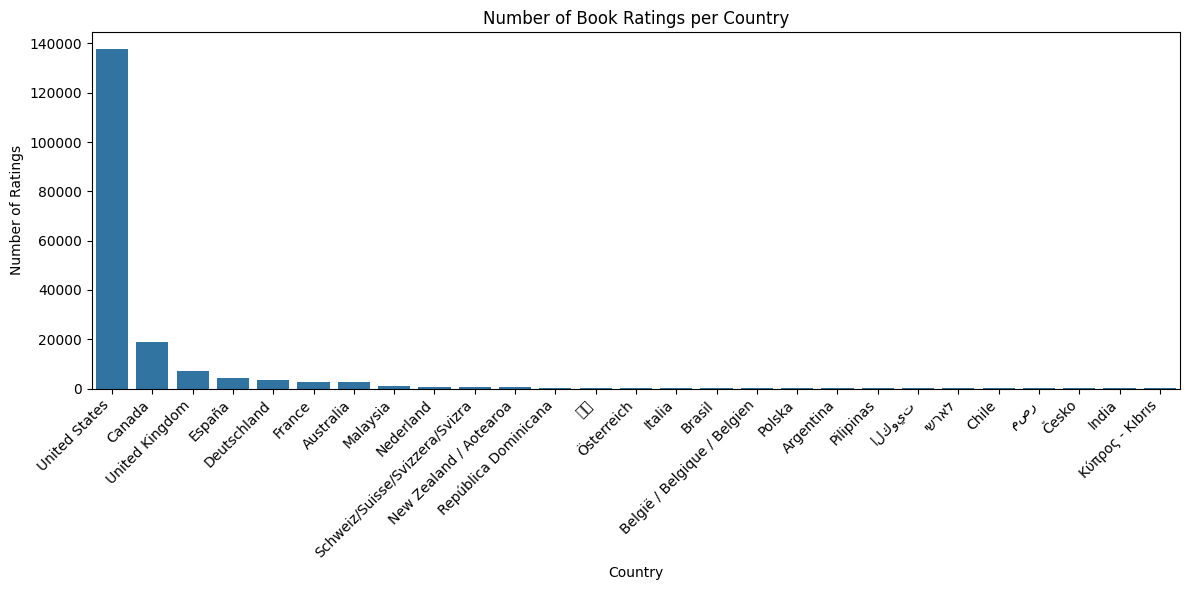

In [ ]:
# Assuming 'merged_all_with_images' contains your final merged dataset
country_ratings = dfs['merged_all_with_images'].groupby('country')['Book-Rating'].count().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_ratings.index, y=country_ratings.values)
plt.title('Number of Book Ratings per Country')
plt.xlabel('Country')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Distribution of Book Ratings

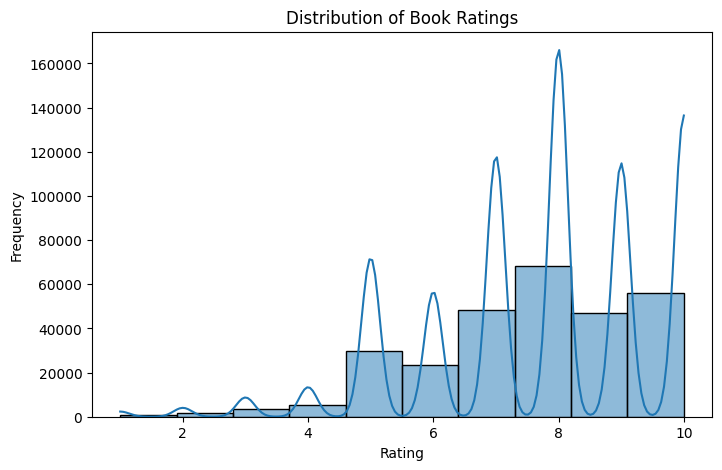

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(dfs['ratings_merged']['Book-Rating'], bins=10, kde=True)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

User Age and Rating Correlation



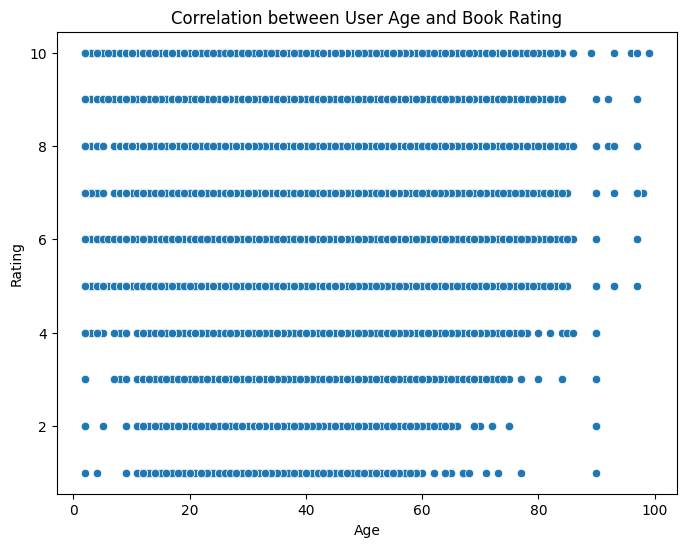

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Book-Rating', data=dfs['ratings_merged'])
plt.title('Correlation between User Age and Book Rating')
plt.xlabel('Age')
plt.ylabel('Rating')
plt.show()

In [ ]:
%timeit predictor(df_val['ISBN'].iloc[0])


<ipython-input-250-b068c0fa8b4c>:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dist = _zz.groupby('User-ID').apply(lambda x: stats.gmean(x['distance'])) * self.distWeight
<ipython-input-250-b068c0fa8b4c>:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dist = _zz.groupby('User-ID').apply(lambda x: stats.gmean(x['distance'])) * self.distWeight
<ipython-input-250-b068c0fa8b4c>:40: DeprecationWarning: Dat

3.73 s ± 429 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
predictor(276678)

<ipython-input-250-b068c0fa8b4c>:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dist = _zz.groupby('User-ID').apply(lambda x: stats.gmean(x['distance'])) * self.distWeight


,0
ISBN,
0451450523,NaN


#Make a prediction for what book user #19611 should get

In [ ]:
dfs['merged_all_with_images'].groupby('User-ID').get_group(19611)

,User-ID,ISBN,Book-Rating,Age,lat,lon,country,state,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Year-Of-Publication-str
17019,19611,3203760118,9,36.0,52.150372,10.359315,Deutschland,Niedersachsen,War Against People. Menschenrechte und Schurke...,Noam Chomsky,2001,Europa Verlag MÃ?Â¼nchen,http://images.amazon.com/images/P/3203760118.0...,http://images.amazon.com/images/P/3203760118.0...,http://images.amazon.com/images/P/3203760118.0...,2001
17020,19611,342333052X,1,36.0,52.150372,10.359315,Deutschland,Niedersachsen,Fermats letzter Satz.,Simon Singh,2000,Dtv,http://images.amazon.com/images/P/342333052X.0...,http://images.amazon.com/images/P/342333052X.0...,http://images.amazon.com/images/P/342333052X.0...,2000
17021,19611,3453042905,9,36.0,52.150372,10.359315,Deutschland,Niedersachsen,Gevatter Tod. Roman. ( Fantasy).,Terry Pratchett,1990,Heyne,http://images.amazon.com/images/P/3453042905.0...,http://images.amazon.com/images/P/3453042905.0...,http://images.amazon.com/images/P/3453042905.0...,1990
17022,19611,3453058607,8,36.0,52.150372,10.359315,Deutschland,Niedersachsen,Die Farben der Magie. Ein Roman von der bizarr...,Terry Pratchett,1992,Heyne,http://images.amazon.com/images/P/3453058607.0...,http://images.amazon.com/images/P/3453058607.0...,http://images.amazon.com/images/P/3453058607.0...,1992
17023,19611,3453062647,10,36.0,52.150372,10.359315,Deutschland,Niedersachsen,WÃ?Â¼hler. Zweiter Roman der Nomen- Trilogie.,Terry Pratchett,1993,Heyne,http://images.amazon.com/images/P/3453062647.0...,http://images.amazon.com/images/P/3453062647.0...,http://images.amazon.com/images/P/3453062647.0...,1993
17024,19611,3453062655,9,36.0,52.150372,10.359315,Deutschland,Niedersachsen,FlÃ?Â¼gel. Dritter Roman der Nomen- Trilogie. ...,Terry Pratchett,1993,Heyne,http://images.amazon.com/images/P/3453062655.0...,http://images.amazon.com/images/P/3453062655.0...,http://images.amazon.com/images/P/3453062655.0...,1993
17025,19611,3453179323,2,36.0,52.150372,10.359315,Deutschland,Niedersachsen,Die zweite Foundation- Trilogie 2. Foundation ...,Greg Bear,2000,Heyne,http://images.amazon.com/images/P/3453179323.0...,http://images.amazon.com/images/P/3453179323.0...,http://images.amazon.com/images/P/3453179323.0...,2000
17026,19611,3453179382,3,36.0,52.150372,10.359315,Deutschland,Niedersachsen,Die zweite Foundation- Trilogie 3. Der Sieg de...,David Brin,2001,Heyne,http://images.amazon.com/images/P/3453179382.0...,http://images.amazon.com/images/P/3453179382.0...,http://images.amazon.com/images/P/3453179382.0...,2001
17027,19611,3492221521,1,36.0,52.150372,10.359315,Deutschland,Niedersachsen,Suche impotenten Mann fÃ?Â¼rs Leben.,Gaby Hauptmann,1995,Piper,http://images.amazon.com/images/P/3492221521.0...,http://images.amazon.com/images/P/3492221521.0...,http://images.amazon.com/images/P/3492221521.0...,1995
17028,19611,3492231888,2,36.0,52.150372,10.359315,Deutschland,Niedersachsen,"Viskovitz, du bist ein Tier. Fabelhafte Liebes...",Alessandro Boffa,2001,Piper,http://images.amazon.com/images/P/3492231888.0...,http://images.amazon.com/images/P/3492231888.0...,http://images.amazon.com/images/P/3492231888.0...,2001


In [ ]:
predictor_a = Predict(df_train, 50).configure(0.01, 1, 0.3, 0.1, 0.1, 0.1)
predictor_a

In [ ]:
_ = predictor_a.call_debug(19611)
_

<ipython-input-250-b068c0fa8b4c>:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dist = _zz.groupby('User-ID').apply(lambda x: stats.gmean(x['distance'])) * self.distWeight


,,Book-Rating,Book-Rating_mean,Book-Rating_std,Book-Rating_sim
User-ID,ISBN,,,,


In [ ]:
output = predictor_a(19611)
output.describe()

<ipython-input-250-b068c0fa8b4c>:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dist = _zz.groupby('User-ID').apply(lambda x: stats.gmean(x['distance'])) * self.distWeight


,0
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [ ]:
top_indices = output.index[np.argsort(output)[:10]]
top_indices

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  return bound(*args, **kwds)


Index(['1879941201', '1879941201', '1879941201', '1879941201', '1879941201',
       '1879941201', '1879941201', '1879941201', '1879941201', '1879941201'],
      dtype='object', name='ISBN')

In [ ]:
dfs['books'].set_index('ISBN').loc[top_indices]

,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Year-Of-Publication-str
ISBN,,,,,,,,
1879941201,The Women on the Porch (Southern Classics Series),Caroline Gordon,2000,J. S. Sanders and Company,http://images.amazon.com/images/P/1879941201.0...,http://images.amazon.com/images/P/1879941201.0...,http://images.amazon.com/images/P/1879941201.0...,2000
1879941201,The Women on the Porch (Southern Classics Series),Caroline Gordon,2000,J. S. Sanders and Company,http://images.amazon.com/images/P/1879941201.0...,http://images.amazon.com/images/P/1879941201.0...,http://images.amazon.com/images/P/1879941201.0...,2000
1879941201,The Women on the Porch (Southern Classics Series),Caroline Gordon,2000,J. S. Sanders and Company,http://images.amazon.com/images/P/1879941201.0...,http://images.amazon.com/images/P/1879941201.0...,http://images.amazon.com/images/P/1879941201.0...,2000
1879941201,The Women on the Porch (Southern Classics Series),Caroline Gordon,2000,J. S. Sanders and Company,http://images.amazon.com/images/P/1879941201.0...,http://images.amazon.com/images/P/1879941201.0...,http://images.amazon.com/images/P/1879941201.0...,2000
1879941201,The Women on the Porch (Southern Classics Series),Caroline Gordon,2000,J. S. Sanders and Company,http://images.amazon.com/images/P/1879941201.0...,http://images.amazon.com/images/P/1879941201.0...,http://images.amazon.com/images/P/1879941201.0...,2000
1879941201,The Women on the Porch (Southern Classics Series),Caroline Gordon,2000,J. S. Sanders and Company,http://images.amazon.com/images/P/1879941201.0...,http://images.amazon.com/images/P/1879941201.0...,http://images.amazon.com/images/P/1879941201.0...,2000
1879941201,The Women on the Porch (Southern Classics Series),Caroline Gordon,2000,J. S. Sanders and Company,http://images.amazon.com/images/P/1879941201.0...,http://images.amazon.com/images/P/1879941201.0...,http://images.amazon.com/images/P/1879941201.0...,2000
1879941201,The Women on the Porch (Southern Classics Series),Caroline Gordon,2000,J. S. Sanders and Company,http://images.amazon.com/images/P/1879941201.0...,http://images.amazon.com/images/P/1879941201.0...,http://images.amazon.com/images/P/1879941201.0...,2000
1879941201,The Women on the Porch (Southern Classics Series),Caroline Gordon,2000,J. S. Sanders and Company,http://images.amazon.com/images/P/1879941201.0...,http://images.amazon.com/images/P/1879941201.0...,http://images.amazon.com/images/P/1879941201.0...,2000


In [ ]:
dfs['books_all'].loc[output.index[np.argsort(output)[:10]]]

KeyError: 'books_all'

#The above are the top 10 books our system recommends for the user #19611